In [1]:
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import pmagpy.contribution_builder as cb
from pmagpy import convert_2_magic as convert
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import LogFormatter 
import matplotlib.patches as patches
from scipy import stats
import math 
import statsmodels.formula.api as sm
  
%matplotlib inline 
from IPython.display import Image
import os
import sys
import cartopy.crs as ccrs
import cartopy
import xml.etree.ElementTree as ET

print('All modules imported!')

All modules imported!


# 1. Low-temperature components (LT1 & LT2)

## (fig. S6)

In [12]:
# Calculate the local field of the sampling site
    # Date is in decimal format, and the unit of altitude is km
local_field = ipmag.igrf([2016.6544, 0.762, 27.921111,108.688333])
print(local_field)

[3.572793368454149e+02 4.330312624421646e+01 4.881562651183514e+04]


## 1.1 LT1 and LT2 (geographic coordinates)

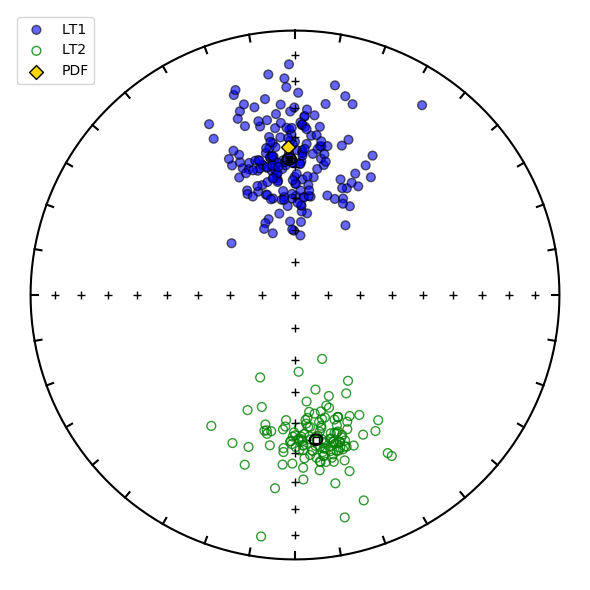

In [13]:
di_block_LT=np.loadtxt('data files/LT1 & LT2/LT1_ALL_new.txt')
di_block_MT1=np.loadtxt('data files/LT1 & LT2/LT2_ALL_new.txt')

dg_ig_LT=di_block_LT[:,(0,1)]
dg_ig_MT1=di_block_MT1[:,(0,1)]

LT_mean=ipmag.fisher_mean(di_block=dg_ig_LT)
MT1_mean=ipmag.fisher_mean(di_block=dg_ig_MT1)

plt.figure(num=1,figsize=(6,6),dpi=100)
ipmag.plot_net(1)

ipmag.plot_di(di_block=dg_ig_LT,markersize=40,color='BLUE',edge='black',alpha=.6,label='LT1',legend="yes")
ipmag.plot_di_mean(dec=LT_mean['dec'],inc=LT_mean['inc'],a95=LT_mean['alpha95'],\
                  marker='s',color='black',markersize=15)

ipmag.plot_di(di_block=dg_ig_MT1,markersize=40,color='green',edge='black',alpha=.8,label='LT2',legend="yes")
ipmag.plot_di_mean(dec=MT1_mean['dec'],inc=MT1_mean['inc'],a95=MT1_mean['alpha95'],\
                  marker='s',color='black',markersize=15)

# Plot the local field
ipmag.plot_di(dec=local_field[0],inc=local_field[1],markersize=50,marker='D',color='gold',edge='black',alpha=1,label='PDF',legend="yes")
#ipmag.plot_di(dec=local_field[0]-180,inc=-local_field[1],markersize=50,marker='D',color='gold',edge='black',alpha=1,label='PDF',legend="no")

#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Fig+Tab/Figs/LT+MT/LT+MT_g.pdf')
plt.show()

## 1.2 LT1 and LT2 (tilt-corrected coordinates)

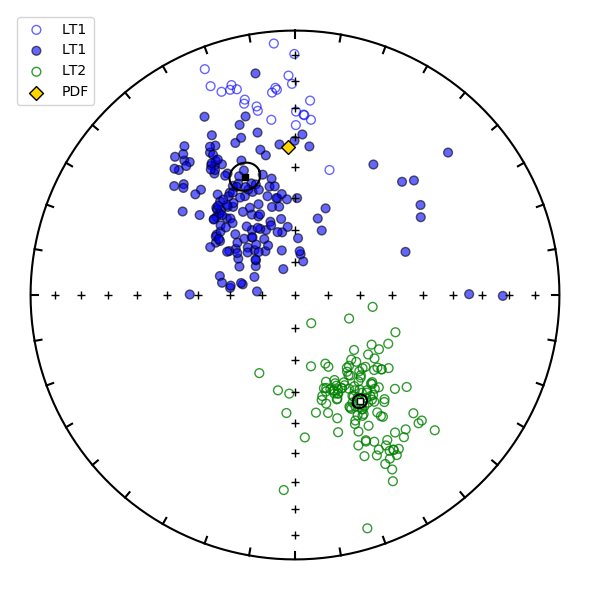

In [14]:
ds_is_LT= np.column_stack(pmag.dotilt_V(di_block_LT[:,(0,1,4,5)]))
ds_is_MT1= np.column_stack(pmag.dotilt_V(di_block_MT1[:,(0,1,4,5)]))

LT_s_mean=ipmag.fisher_mean(di_block=ds_is_LT)
MT1_s_mean=ipmag.fisher_mean(di_block=ds_is_MT1)

plt.figure(num=1,figsize=(6,6),dpi=100)
ipmag.plot_net(1)

ipmag.plot_di(di_block=ds_is_LT,markersize=40,color='BLUE',edge='black',alpha=.6,label='LT1',legend="yes")
ipmag.plot_di_mean(dec=LT_s_mean['dec'],inc=LT_s_mean['inc'],a95=LT_s_mean['alpha95'],\
                  marker='s',color='black',markersize=15)


ipmag.plot_di(di_block=ds_is_MT1,markersize=40,color='green',edge='black',alpha=.8,label='LT2',legend="yes")
ipmag.plot_di_mean(dec=MT1_s_mean['dec'],inc=MT1_s_mean['inc'],a95=MT1_s_mean['alpha95'],\
                  marker='s',color='black',markersize=15)

# Plot the local field
ipmag.plot_di(dec=local_field[0],inc=local_field[1],markersize=50,marker='D',color='gold',edge='black',alpha=1,label='PDF',legend="yes")
#ipmag.plot_di(dec=local_field[0]-180,inc=-local_field[1],markersize=50,marker='D',color='gold',edge='black',alpha=1,label='PDF',legend="no")

#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Fig+Tab/Figs/LT+MT/LT+MT_s.pdf')
plt.show()

## 1.3 LT1 fold test

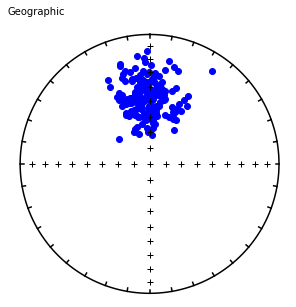

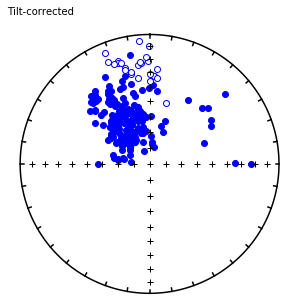

doing  500  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
-9 - 1 percent unfolding
range of all bootstrap samples: 
-10  -  3 percent unfolding


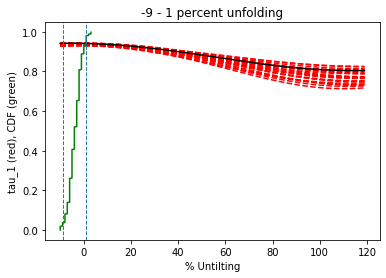

In [13]:
raw_data=np.loadtxt('data files/LT1 & LT2/LT1_ALL_new.txt')
data= raw_data[:,(0,1,4,5)]

ipmag.bootstrap_fold_test(data, num_sims=500,save=False, save_folder='/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Fig+Tab/Figs/LT+MT', fmt='pdf')

## 1.4 LT2 fold test

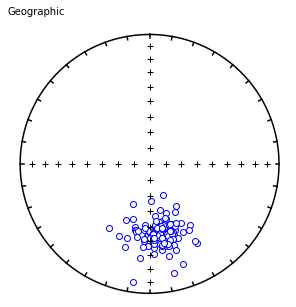

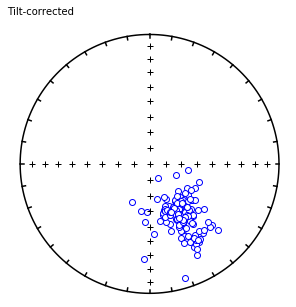

doing  500  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
-10 - 13 percent unfolding
range of all bootstrap samples: 
-10  -  24 percent unfolding


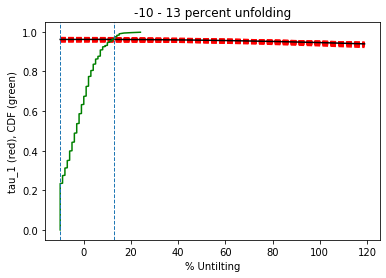

In [15]:
raw_data=np.loadtxt('data files/LT1 & LT2/LT2_ALL_new.txt')
data= raw_data[:,(0,1,4,5)]

ipmag.bootstrap_fold_test(data, num_sims=500,save=False, save_folder='/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Fig+Tab/Figs/LT+MT', fmt='pdf')

# 2. High-temperature component (HT1, specimen directions)

## (fig. S8)

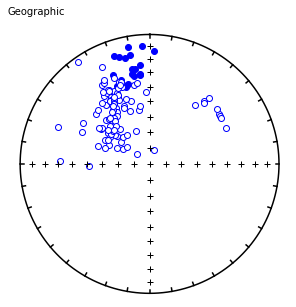

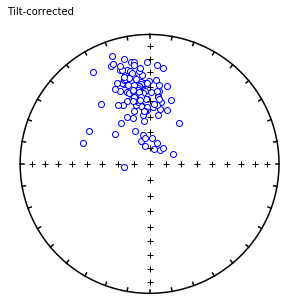

doing  1000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
90 - 101 percent unfolding
range of all bootstrap samples: 
86  -  104 percent unfolding


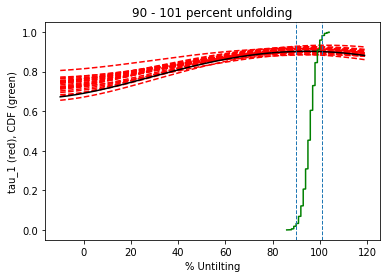

In [19]:
# Fold test for all 125 specimens
data=np.loadtxt('data files/HT1 specimen dirs/sample_dir (g)_beddings.txt')

ipmag.bootstrap_fold_test(data, num_sims=1000,save=False,save_folder='/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S8 fold test_specimen', fmt='pdf',)

# 3. HT1 specimen directions grouped by sites (geographic)

## (fig. S13)

Dec: 313.4  Inc: -52.4
Number of directions in mean (n): 24
Angular radius of 95% confidence (a_95): 7.4
Precision parameter (k) estimate: 16.9


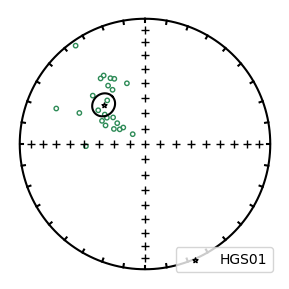

In [91]:
di_block1=np.loadtxt('data files/Specimen directions_grouped by sites/HGS01.txt')
mode_1_fpars=ipmag.fisher_mean(di_block=di_block1)

plt.figure(num=1,figsize=(3,3),dpi=100)
ipmag.plot_net(1)
ipmag.plot_di(markersize=10,di_block=di_block1,color='seagreen',edge='black')
ipmag.plot_di_mean(dec=mode_1_fpars['dec'],inc=mode_1_fpars['inc'],a95=mode_1_fpars['alpha95'],\
                  marker='*',color='black',markersize=14,label='HGS01',legend='yes')
plt.legend(loc='lower right',fontsize=10)

#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S9 specimen dirs/HGS01.pdf',bbox_inches='tight')
ipmag.print_direction_mean(mode_1_fpars)

Dec: 348.2  Inc: 25.2
Number of directions in mean (n): 20
Angular radius of 95% confidence (a_95): 4.5
Precision parameter (k) estimate: 52.5


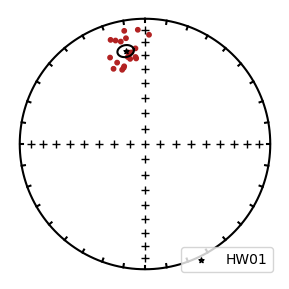

In [90]:
di_block1=np.loadtxt('data files/Specimen directions_grouped by sites/HW01.txt')
mode_1_fpars=ipmag.fisher_mean(di_block=di_block1)

plt.figure(num=1,figsize=(3,3),dpi=100)
ipmag.plot_net(1)
ipmag.plot_di(markersize=10,di_block=di_block1,color='firebrick',edge='firebrick')
ipmag.plot_di_mean(dec=mode_1_fpars['dec'],inc=mode_1_fpars['inc'],a95=mode_1_fpars['alpha95'],\
                  marker='*',color='black',markersize=14,label='HW01',legend='yes')
plt.legend(loc='lower right',fontsize=10)

#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S9 specimen dirs/HW01.pdf',bbox_inches='tight')
ipmag.print_direction_mean(mode_1_fpars)

Dec: 49.5  Inc: -35.9
Number of directions in mean (n): 9
Angular radius of 95% confidence (a_95): 5.1
Precision parameter (k) estimate: 101.5


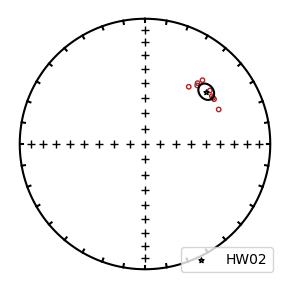

In [89]:
di_block1=np.loadtxt('data files/Specimen directions_grouped by sites/HW02.txt')
mode_1_fpars=ipmag.fisher_mean(di_block=di_block1)

plt.figure(num=1,figsize=(3,3),dpi=100)
ipmag.plot_net(1)
ipmag.plot_di(markersize=10,di_block=di_block1,color='firebrick',edge='black')
ipmag.plot_di_mean(dec=mode_1_fpars['dec'],inc=mode_1_fpars['inc'],a95=mode_1_fpars['alpha95'],\
                  marker='*',color='black',markersize=14,label='HW02',legend='yes')
plt.legend(loc='lower right',fontsize=10)

#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S9 specimen dirs/HW02.pdf',bbox_inches='tight')
ipmag.print_direction_mean(mode_1_fpars)

Dec: 320.7  Inc: -50.1
Number of directions in mean (n): 10
Angular radius of 95% confidence (a_95): 15.5
Precision parameter (k) estimate: 10.6


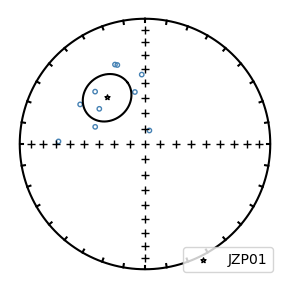

In [88]:
di_block1=np.loadtxt('data files/Specimen directions_grouped by sites/JZP01_text.txt')
mode_1_fpars=ipmag.fisher_mean(di_block=di_block1)

plt.figure(num=1,figsize=(3,3),dpi=100)
ipmag.plot_net(1)
ipmag.plot_di(markersize=10,di_block=di_block1,color='steelblue',edge='black')
ipmag.plot_di_mean(dec=mode_1_fpars['dec'],inc=mode_1_fpars['inc'],a95=mode_1_fpars['alpha95'],\
                  marker='*',color='black',markersize=14,label='JZP01',legend='yes')
plt.legend(loc='lower right',fontsize=10)

#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S9 specimen dirs/JZP01.pdf',bbox_inches='tight')
ipmag.print_direction_mean(mode_1_fpars)

Dec: 331.2  Inc: -43.1
Number of directions in mean (n): 27
Angular radius of 95% confidence (a_95): 3.8
Precision parameter (k) estimate: 53.3


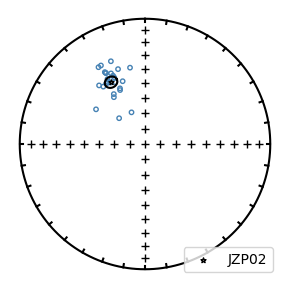

In [87]:
di_block1=np.loadtxt('data files/Specimen directions_grouped by sites/JZP02.txt')
mode_1_fpars=ipmag.fisher_mean(di_block=di_block1)

plt.figure(num=1,figsize=(3,3),dpi=100)
ipmag.plot_net(1)
ipmag.plot_di(markersize=10,di_block=di_block1,color='steelblue',edge='black')
ipmag.plot_di_mean(dec=mode_1_fpars['dec'],inc=mode_1_fpars['inc'],a95=mode_1_fpars['alpha95'],\
                  marker='*',color='black',markersize=14,label='JZP02',legend='yes')
plt.legend(loc='lower right',fontsize=10)

#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S9 specimen dirs/JZP02.pdf',bbox_inches='tight')
ipmag.print_direction_mean(mode_1_fpars)

Dec: 334.8  Inc: -40.2
Number of directions in mean (n): 13
Angular radius of 95% confidence (a_95): 6.2
Precision parameter (k) estimate: 45.5


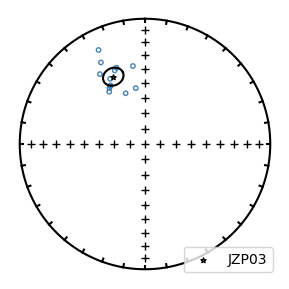

In [86]:
di_block1=np.loadtxt('data files/Specimen directions_grouped by sites/JZP03.txt')
mode_1_fpars=ipmag.fisher_mean(di_block=di_block1)

plt.figure(num=1,figsize=(3,3),dpi=100)
ipmag.plot_net(1)
ipmag.plot_di(markersize=10,di_block=di_block1,color='steelblue',edge='black')
ipmag.plot_di_mean(dec=mode_1_fpars['dec'],inc=mode_1_fpars['inc'],a95=mode_1_fpars['alpha95'],\
                  marker='*',color='black',markersize=14,label='JZP03',legend='yes')
plt.legend(loc='lower right',fontsize=10)

#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S9 specimen dirs/JZP03.pdf',bbox_inches='tight')
ipmag.print_direction_mean(mode_1_fpars)

Dec: 314.5  Inc: -57.0
Number of directions in mean (n): 22
Angular radius of 95% confidence (a_95): 2.3
Precision parameter (k) estimate: 184.7


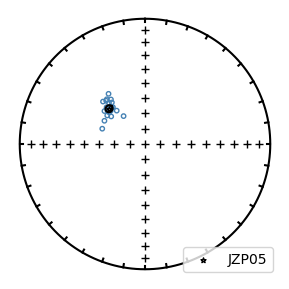

In [85]:
di_block1=np.loadtxt('data files/Specimen directions_grouped by sites/JZP05.txt')
mode_1_fpars=ipmag.fisher_mean(di_block=di_block1)

plt.figure(num=1,figsize=(3,3),dpi=100)
ipmag.plot_net(1)
ipmag.plot_di(markersize=10,di_block=di_block1,color='steelblue',edge='black')
ipmag.plot_di_mean(dec=mode_1_fpars['dec'],inc=mode_1_fpars['inc'],a95=mode_1_fpars['alpha95'],\
                  marker='*',color='black',markersize=14,label='JZP05',legend='yes')
plt.legend(loc='lower right',fontsize=10)

#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S9 specimen dirs/JZP05.pdf',bbox_inches='tight')
ipmag.print_direction_mean(mode_1_fpars)

Dec: 317.7  Inc: -60.0
Number of directions in mean (n): 11
Angular radius of 95% confidence (a_95): 6.9
Precision parameter (k) estimate: 45.3


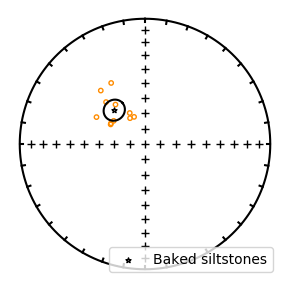

In [83]:
di_block1=np.loadtxt('data files/Specimen directions_grouped by sites/Baked.txt')
mode_1_fpars=ipmag.fisher_mean(di_block=di_block1)

plt.figure(num=1,figsize=(3,3),dpi=100)
ipmag.plot_net(1)
ipmag.plot_di(markersize=10,di_block=di_block1,color='darkorange',edge='black')
ipmag.plot_di_mean(dec=mode_1_fpars['dec'],inc=mode_1_fpars['inc'],a95=mode_1_fpars['alpha95'],\
                  marker='*',color='black',markersize=14,label='Baked siltstones',legend='yes')
plt.legend(loc='lower right',fontsize=10)

#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S9 specimen dirs/Baked siltstones.pdf',bbox_inches='tight')
ipmag.print_direction_mean(mode_1_fpars)

Dec: 61.1  Inc: -79.5
Number of directions in mean (n): 19
Angular radius of 95% confidence (a_95): 3.0
Precision parameter (k) estimate: 125.2


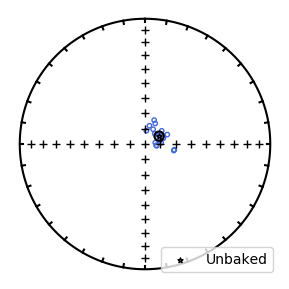

In [84]:
di_block1=np.loadtxt('data files/Specimen directions_grouped by sites/Unbaked.txt')
mode_1_fpars=ipmag.fisher_mean(di_block=di_block1)

plt.figure(num=1,figsize=(3,3),dpi=100)
ipmag.plot_net(1)
ipmag.plot_di(markersize=10,di_block=di_block1,color='royalblue',edge='royalblue')
ipmag.plot_di_mean(dec=mode_1_fpars['dec'],inc=mode_1_fpars['inc'],a95=mode_1_fpars['alpha95'],\
                  marker='*',color='black',markersize=14,label='Unbaked',legend='yes')
plt.legend(loc='lower right',fontsize=10)

#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S9 specimen dirs/Unbaked siltstones.pdf',bbox_inches='tight')
ipmag.print_direction_mean(mode_1_fpars)

# 4. site-mean directions

### 4.1 Data table

In [64]:
di_block=pd.read_csv('data files/Site-mean directions/Sills (g+s)_with_beddings.csv',header=0)
di_block

,Rock_unit,Section,Color_code,Dg,Ig,Ds,Is,k,a95,n,Pole_Long (g),Pole_Lat (g),Pole_Long (s),Pole_Lat (s),dp,dm,Dip_dir,Dip,Sample_Lat,Sample_Long,Paleo_lat
0,HGS01,HGS,seagreen,313.4,-52.4,346.6,-64.9,16.9,7.4,24,327.693637,14.730800,298.043927,14.243179,9.611417,11.926817,271.2,23.0,27.915556,108.635556,-46.866875
1,HW01,HW,firebrick,348.2,25.2,353.9,-45.7,52.5,4.5,20,328.074396,71.693817,295.351049,34.689809,3.653559,5.734285,330.0,74.6,27.870000,108.746389,-27.129197
2,HW02,HW,firebrick,49.5,-35.9,3.4,-42.6,101.5,5.1,9,238.110934,22.383796,284.873747,37.341875,3.884949,6.294957,110.0,51.5,27.864444,108.760000,-24.691722
3,JZP01,JZP,steelblue,320.7,-50.1,344.3,-42.4,10.6,15.5,10,324.047492,20.315112,306.209415,35.450155,11.760471,19.093837,223.9,23.3,27.871111,108.621111,-24.539672
4,JZP02,JZP,steelblue,331.2,-43.1,346.8,-32.2,53.3,3.8,27,318.955846,30.233997,305.913774,42.884316,2.414133,4.283387,220.7,22.6,27.871111,108.621111,-17.477484
5,JZP03,JZP,steelblue,334.8,-40.2,353.2,-32.7,45.5,6.2,13,316.748940,33.697812,297.617883,43.857711,3.968735,7.015149,237.4,25.4,27.873611,108.622778,-17.796334
6,JZP05,JZP,steelblue,314.5,-57.0,349.5,-47.4,184.7,2.3,22,323.893048,11.877933,299.585819,32.709164,1.937264,2.985199,223.0,27.7,27.865833,108.617222,-28.534956
7,Baked siltstones,JZP,darkorange,317.7,-60.0,350.7,-51.5,45.3,6.9,11,319.819791,10.848489,297.649972,29.327407,6.381286,9.384122,223.9,23.3,27.871111,108.621111,-32.152900
8,Unbaked siltstones,JZP,royalblue,61.1,-79.5,47.5,-57.4,125.2,3.0,19,270.083000,-16.848444,252.405294,10.566914,3.204192,4.384649,220.7,22.6,27.870556,108.620833,-38.019299


### 4.2 Geographic coordinates

### (fig. S7A)

Sill mean in geographic coordinates
Dec: 339.8  Inc: -42.1
Number of directions in mean (n): 7
Angular radius of 95% confidence (a_95): 30.0
Precision parameter (k) estimate: 5.0


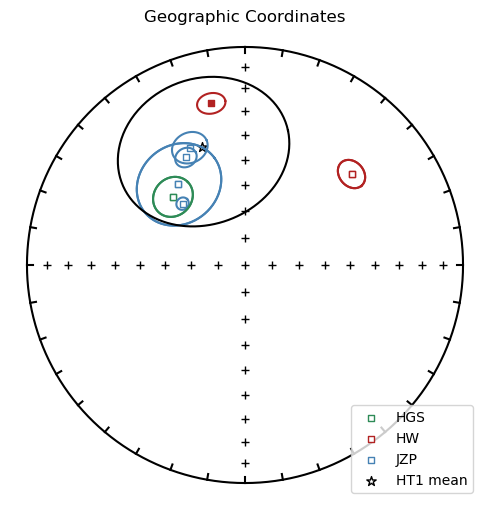

In [99]:
di_block=pd.read_csv('data files/Site-mean directions/Sills (g+s)_with_beddings.csv',header=0)
plt.figure(num=0,figsize=(5,5),dpi=100)
ipmag.plot_net(0)
dot_size=20
di_block_mean=ipmag.fisher_mean(di_block = di_block.loc[0:6,['Dg','Ig']])

for i in range(len(di_block)-2):
    ipmag.plot_di_mean(dec=di_block.loc[i,'Dg'],inc=di_block.loc[i,'Ig'],a95=di_block.loc[i,'a95'],marker='s',color=di_block.loc[i,'Color_code'],markersize=dot_size ,legend="no")

ipmag.plot_di_mean(dec=di_block.loc[0,'Dg'],inc=di_block.loc[0,'Ig'],a95=di_block.loc[0,'a95'],marker='s',color=di_block.loc[0,'Color_code'],markersize=dot_size ,label= di_block.loc[0,'Section'],legend="yes")
ipmag.plot_di_mean(dec=di_block.loc[2,'Dg'],inc=di_block.loc[2,'Ig'],a95=di_block.loc[2,'a95'],marker='s',color=di_block.loc[2,'Color_code'],markersize=dot_size ,label= di_block.loc[2,'Section'],legend="yes")
ipmag.plot_di_mean(dec=di_block.loc[3,'Dg'],inc=di_block.loc[3,'Ig'],a95=di_block.loc[3,'a95'],marker='s',color=di_block.loc[3,'Color_code'],markersize=dot_size ,label= di_block.loc[3,'Section'],legend="yes")
ipmag.plot_di_mean(dec=di_block_mean['dec'],inc=di_block_mean['inc'],a95=di_block_mean['alpha95'],marker='*',color='black',markersize=50 ,label='HT1 mean',legend="yes")

title = plt.title('Geographic Coordinates', fontdict=None, loc='center', pad=None)
plt.legend(loc='lower right',fontsize=10)

print('Sill mean in geographic coordinates')
ipmag.print_direction_mean(di_block_mean)
#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S6 fold test/Geographic.pdf')

### 4.3 Tilt-corrected coordinates

### (fig. S7B)

Sill mean in sedimentary coordinates
Dec: 351.3  Inc: -44.1
Number of directions in mean (n): 7
Angular radius of 95% confidence (a_95): 8.9
Precision parameter (k) estimate: 46.5


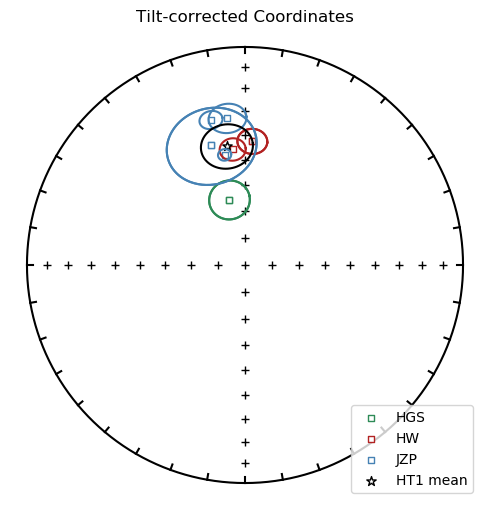

In [100]:
plt.figure(num=0,figsize=(5,5),dpi=100)
ipmag.plot_net(0)
dot_size=20
di_block_mean=ipmag.fisher_mean(di_block = di_block.loc[0:6,['Ds','Is']])

for i in range(len(di_block)-2):
    ipmag.plot_di_mean(dec=di_block.loc[i,'Ds'],inc=di_block.loc[i,'Is'],a95=di_block.loc[i,'a95'],marker='s',color=di_block.loc[i,'Color_code'],markersize=dot_size ,legend="no")

ipmag.plot_di_mean(dec=di_block.loc[0,'Ds'],inc=di_block.loc[0,'Is'],a95=di_block.loc[0,'a95'],marker='s',color=di_block.loc[0,'Color_code'],markersize=dot_size ,label= di_block.loc[0,'Section'],legend="yes")
ipmag.plot_di_mean(dec=di_block.loc[2,'Ds'],inc=di_block.loc[2,'Is'],a95=di_block.loc[2,'a95'],marker='s',color=di_block.loc[2,'Color_code'],markersize=dot_size ,label= di_block.loc[2,'Section'],legend="yes")
ipmag.plot_di_mean(dec=di_block.loc[3,'Ds'],inc=di_block.loc[3,'Is'],a95=di_block.loc[3,'a95'],marker='s',color=di_block.loc[3,'Color_code'],markersize=dot_size ,label= di_block.loc[3,'Section'],legend="yes")
ipmag.plot_di_mean(dec=di_block_mean['dec'],inc=di_block_mean['inc'],a95=di_block_mean['alpha95'],marker='*',color='black',markersize=50 ,label='HT1 mean',legend="yes")

title = plt.title('Tilt-corrected Coordinates', fontdict=None, loc='center', pad=None)
plt.legend(loc='lower right',fontsize=10)

print('Sill mean in sedimentary coordinates')
ipmag.print_direction_mean(di_block_mean)
#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S6 fold test/Tilt-corrected.pdf')

# 5. Fold test

### 5.1 Step unfolding fuction 

In [120]:
# Function to plot the unfolding test

def step_unfolding (direction='',xrange=[0,1.5,0.05],pty='go'):

    '''Input: (1) direction = the path of the txt file (!!! must be the path);
              (2) xrange = [min,max,by]; default is [0,1.51,0.05]
              (3) pty = ''; default is 'go'  '''           
    
    # Creat steps of the step-unfolding: arange(min, max, by)
    step= np.arange(xrange[0],xrange[1]+xrange[2],xrange[2])
    
    # Get the length of the step, which can be used further
    length=len(step)
    
    # Creat "results" to store the 'k' values. The length of it is determined by the length of the step)
    results=list(range(0,length))
    
    # Creat "Order" to help storing data into "results"
    order=list(range(0,length))
    
    # The For Loop to do the progressisve unfolding
    for i in range(0,length):    
        di_block1=np.loadtxt(direction)
        # Have to read the original data again... Need to fix it later
        di_block1[:,3] = step[i]*di_block1[:,3]
        di_block2=pmag.dotilt_V(di_block1)
        di_block_mean1=ipmag.fisher_mean(di_block=np.column_stack(di_block2))
        results[order[i]] = di_block_mean1['k']
        
    # Now the "k" data is all saved in "results"   
    
    # Plot the results 
    plt.plot(step*100,results,'seagreen',linewidth=4)
    plt.xlabel('Unfolding (%)')
    plt.ylabel('Precision parameter (k)')
    
    plt.axvspan(90,110,0,50, alpha=0.2, color='C7')
    plt.axvline(90, alpha=1, color='C7',linestyle='--')
    plt.axvline(110, alpha=1, color='C7',linestyle='--')
    plt.axvline(x= (step*100).tolist()[results.index(max(results))],linewidth=2, color='r')
    
    print('The best unfolding = ', (step*100).tolist()[results.index(max(results))], '\nThe largest k = ' , max(results))

### 5.2 Step unfolding using site means (N=7)

### (fig. S7C)

The best unfolding =  98.9 
The largest k =  46.54988764002522


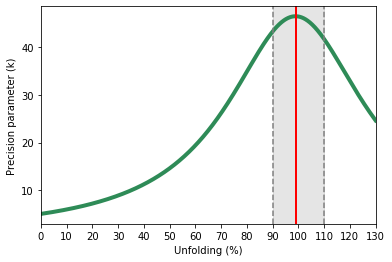

In [132]:
# Stepwise unfolding test on the 7 sill means
step_unfolding(direction='data files/Site-mean directions/Dirs (g)_with_beddings (7 sills).txt',xrange=[0,1.3,0.001])

plt.xticks(np.arange(0,140,10))
plt.xlim(xmin=0,xmax=130)
plt.grid(False)  

#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S7 fold test/fold test.pdf')

# 6. Compare HT1 mean calculated by specimen directions and site-mean directions

In [36]:
# Calculate HT1 mean using specimen directions (n=125) in sedimentary coordinates
data=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/May_2021/Summary/n125_sample (s).txt')
all_samples_mean = ipmag.fisher_mean(di_block = data[:,(0,1)])

print('All samples mean in sedimentary coordinates')
ipmag.print_direction_mean(all_samples_mean)

All samples mean in sedimentary coordinates
Dec: 350.3  Inc: -44.9
Number of directions in mean (n): 125
Angular radius of 95% confidence (a_95): 2.9
Precision parameter (k) estimate: 20.4


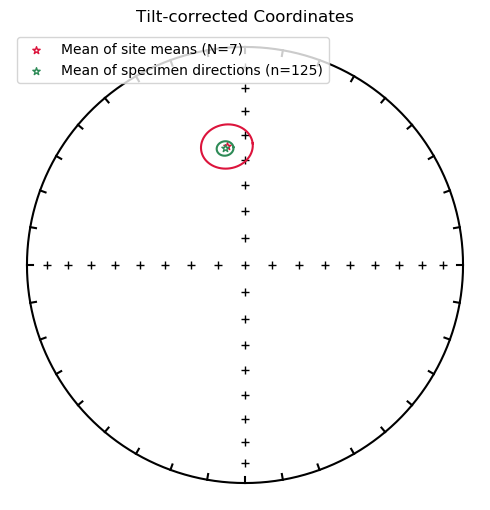

In [15]:
# Plot the means of site-means and specimens in sed coordinates
plt.figure(num=0,figsize=(5,5),dpi=100)
ipmag.plot_net(0)
dot_size=20

ipmag.plot_di_mean(dec=351.3,inc=-44.1,a95=8.9,\
                  marker='*',color='crimson',markersize=30,label='Mean of site means (N=7)',legend="yes")

ipmag.plot_di_mean(dec=350.3,inc=-44.9,a95=2.9,\
                  marker='*',color='seagreen',markersize=30,label='Mean of specimen directions (n=125)',legend="yes")

title = plt.title('Tilt-corrected Coordinates', fontdict=None, loc='center', pad=None)

# 7. Baked-contact test

## 7.1 Geographic coordinates

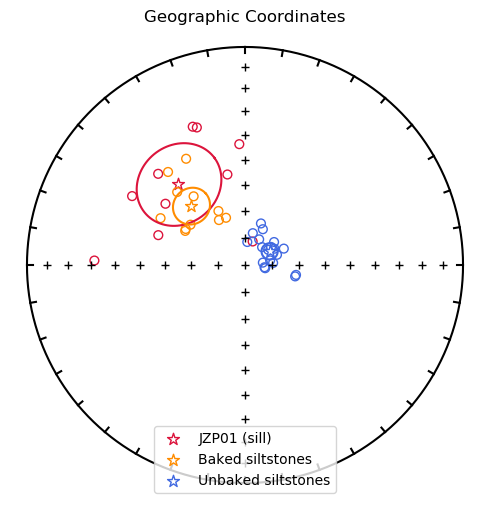

In [54]:
# Geographic coordinates
Baked = np.loadtxt('data files/Baked_contact test/Baked.txt')
mode_1_fpars=ipmag.fisher_mean(di_block=Baked)

JZP_01 = np.loadtxt('data files/Baked_contact test/JZP01_text.txt')
mode_2_fpars=ipmag.fisher_mean(di_block=JZP_01)

Unbaked = np.loadtxt('data files/Baked_contact test/Unbaked.txt')
mode_3_fpars=ipmag.fisher_mean(di_block=Unbaked)

plt.figure(num=0,figsize=(5,5),dpi=100)
ipmag.plot_net(0)

ipmag.plot_di(markersize=40,di_block=JZP_01,color='crimson',edge='black')
ipmag.plot_di_mean(dec=mode_2_fpars['dec'],inc=mode_2_fpars['inc'],a95=mode_2_fpars['alpha95'],\
                  marker='*',color='crimson',markersize=80,label='JZP01 (sill)',legend="yes")

ipmag.plot_di(markersize=40,di_block=Baked,color='darkorange',edge='black')
ipmag.plot_di_mean(dec=mode_1_fpars['dec'],inc=mode_1_fpars['inc'],a95=mode_1_fpars['alpha95'],\
                  marker='*',color='darkorange',markersize=80,label='Baked siltstones',legend="yes")

ipmag.plot_di(markersize=40,di_block=Unbaked,color='royalblue',edge='black')
ipmag.plot_di_mean(dec=mode_3_fpars['dec'],inc=mode_3_fpars['inc'],a95=mode_3_fpars['alpha95'],\
                  marker='*',color='royalblue',markersize=80,label='Unbaked siltstones',legend="yes")

title = plt.title('Geographic Coordinates', fontdict=None, loc='center', pad=None)
plt.legend(loc='lower center',fontsize=10)
plt.show()
#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S9 baked test/Geo.pdf', bbox_inches='tight')

## 7.2 Tilt-corrected coordinates

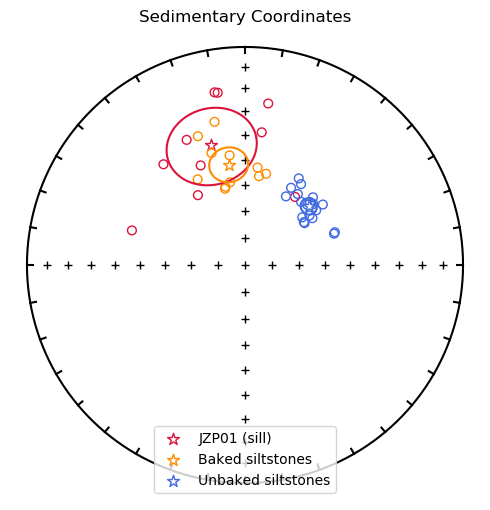

In [55]:
# Sedimentary coordinates
Baked = np.loadtxt('data files/Baked_contact test/Baked_(s).txt')
mode_1_fpars=ipmag.fisher_mean(di_block=Baked)

JZP_01 = np.loadtxt('data files/Baked_contact test/JZP01_text_(s).txt')
mode_2_fpars=ipmag.fisher_mean(di_block=JZP_01)

Unbaked = np.loadtxt('data files/Baked_contact test/Unbaked_(s).txt')
mode_3_fpars=ipmag.fisher_mean(di_block=Unbaked)

plt.figure(num=1,figsize=(5,5),dpi=100)
ipmag.plot_net(1)

ipmag.plot_di(markersize=40,di_block=JZP_01,color='crimson',edge='black')
ipmag.plot_di_mean(dec=mode_2_fpars['dec'],inc=mode_2_fpars['inc'],a95=mode_2_fpars['alpha95'],\
                  marker='*',color='crimson',markersize=80,label='JZP01 (sill)',legend="yes")

ipmag.plot_di(markersize=40,di_block=Baked,color='darkorange',edge='black')
ipmag.plot_di_mean(dec=mode_1_fpars['dec'],inc=mode_1_fpars['inc'],a95=mode_1_fpars['alpha95'],\
                  marker='*',color='darkorange',markersize=80,label='Baked siltstones',legend="yes")

ipmag.plot_di(markersize=40,di_block=Unbaked,color='royalblue',edge='black')
ipmag.plot_di_mean(dec=mode_3_fpars['dec'],inc=mode_3_fpars['inc'],a95=mode_3_fpars['alpha95'],\
                  marker='*',color='royalblue',markersize=80,label='Unbaked siltstones',legend="yes")

title = plt.title('Sedimentary Coordinates', fontdict=None, loc='center', pad=None)
plt.legend(loc='lower center',fontsize=10)
plt.show()
#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S9 baked test/tilt-corrected.pdf', bbox_inches='tight')

## 7.3 Great-circle fits to part of specimens showing non-origin-trending decay

{'tilt_correction': '0', 'n_total': '6 ', 'n_lines': '0 ', 'n_planes': '6 ', 'R': '5.9834 ', 'K': '   120 ', 'alpha95': '    8.0 ', 'dec': '  305.9 ', 'inc': '  -52.2 '}


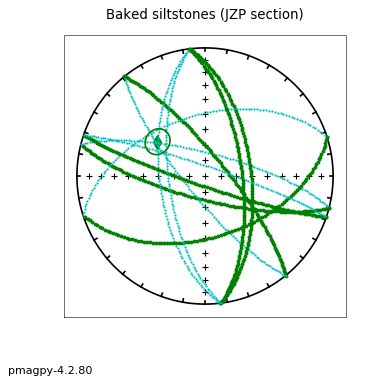

In [70]:
site_data=pd.read_csv('data files/Baked_contact test//Baked_lnp+dir_latest.txt',sep='\t')

sites=site_data.site.unique()
sites

cnt=1
for site in sites[0:1]:
    pmagplotlib.plot_init(cnt, 5, 5)
    site_data=site_data[site_data.site==site].to_dict('records')
    fpars=pmag.dolnp(site_data,'specimen_direction_type')
    pmagplotlib.plot_lnp(cnt,site,site_data,fpars,'specimen_direction_type')
    cnt+=1

print(fpars)
#plt.savefig('/Ubsers/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S9 baked test/planes.pdf', bbox_inches='tight')

## 7.4 Watson's V test of common mean

Results of Watson V test: 

Watson's V:           2.5
Critical value of V:  6.7
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 10.0
Critical angle for M&M1990:   16.5
The McFadden and McElhinny (1990) classification for
this test is: 'C'


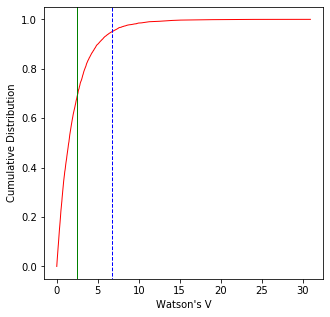

<Figure size 252x180 with 0 Axes>

In [52]:
plot = plt.figure(1,(5,5))
results = ipmag.common_mean_watson(JZP_01,Baked,plot='yes',save=True,save_folder='/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S9 baked test')

# 8. Geochronology plot

## (fig. S3)

In [20]:
# Fuction credited to Park et al. (2021)
# https://github.com/Swanson-Hysell-Group/Xiajiang_Paleomagnetism
def plot_dates(zircon_means, zircon_2sigmas, include, sample_means, sample_2sigmas, colours, labels,
               legend=True, figsize=None, ylim=None, lineweight=None, bbox_to_anchor=None, mean_box=None):
    """
    Make a date distribution plot.
    
    Parameters
    ----------
    zircon_means : list of numpy arrays
        individual zircon mean dates (each array being a sample, and each element of that array being a zircon)
    
    zircon_2sigmas : list of numpy arrays
        individual zircon 2 sigmas (each array being a sample, and each element of that array being a zircon)
        
    include : list of lists
        'yes' or 'no' for inclusion of individual zircon in mean (each array being a sample, and each element of
        that array being a zircon)
        
    sample_means : list
        sample mean dates (each element being a sample)
        
    sample_2sigmas : list
        sample 2 sigmas (each element being a sample)
        
    colours : list
        sample colours for plotting (each element being a sample)
        
    labels : list
        sample labels for the legend (each element being a sample)
        
    legend : boolean
        if True, plot legend (default True, optional)
        
    figsize : tuple
        figure size (default None, optional)
        
    ylim : tuple
        figure y limits (default None, optional)
        
    lineweight : float
        line weight for individual zircons (default None, optional)
        
    bbox_to_anchor : tuple
        for manual placement of the legend (default None, optional)
        
    mean_box : list
        booleans, for decided whether to draw the mean and 2 sigma for a sample (default None, optional)
        
    Returns
    -------
    fig : figure handle
    
    ax : axis handle
    """
    # formatting constants
    zircon_spacing = 1
    sample_spacing = 6 - zircon_spacing
    start_x = 3
    yes_alpha = 0.8
    no_alpha = 0.2
    if lineweight==None:
        lineweight=3
    
    # initialize current x
    current_x = start_x
    
    # number of samples
    n_samples = len(zircon_means)
    
    # plot
    if figsize == None:
        fig, ax = plt.subplots()
    else:
        fig, ax = plt.subplots(figsize=figsize)
    
    # iterate over each sample
    plot_mean_box = False
    for i in range(n_samples):
        
        # number of zircons in sample
        n_zircons = len(zircon_means[i])
        
        # check if we need to plot the mean box
        if mean_box==None:
            plot_mean_box = True
        elif mean_box[i]:
            plot_mean_box = True
        
        # iterate over each zircon to find the mean box coordinates
        if plot_mean_box:
            
            # start coordinates
            for j in range(n_zircons):
                if include[i][j] == 'yes':
                    start_box_x = current_x + j*zircon_spacing - zircon_spacing/2
                    break
            
            # end coordinates
            for j in -(np.arange(n_zircons,dtype=int)+1):
                if include[i].iloc[j] == 'yes':
                    end_box_x = current_x + (n_zircons+j)*zircon_spacing + zircon_spacing/2
                    break

            # plot the mean box
            # the 2sigma uncertainty on the sample age
            if sample_2sigmas != None:
                rectangle = matplotlib.patches.Rectangle((start_box_x, sample_means[i]-sample_2sigmas[i]),
                                                         (end_box_x-start_box_x), sample_2sigmas[i]*2,
                                                         facecolor='C7',edgecolor='none')
                ax.add_patch(rectangle)

            # the mean age
            if sample_means != None:
                ax.hlines(sample_means[i], start_box_x, end_box_x, colors='k')
        
        # iterate over each zircon to plot the zircons
        marked = False # legend control
        for j in range(n_zircons):
            
            if marked:
                if include[i][j] == 'yes':
                    ax.vlines(current_x,
                              zircon_means[i][j]-zircon_2sigmas[i][j],
                              zircon_means[i][j]+zircon_2sigmas[i][j],
                              colors=colours[i], lw=lineweight, alpha=yes_alpha)
                else:
                    ax.vlines(current_x,
                              zircon_means[i][j]-zircon_2sigmas[i][j],
                              zircon_means[i][j]+zircon_2sigmas[i][j],
                              colors=colours[i], lw=lineweight, alpha=no_alpha)
            else:
                if include[i][j] == 'yes':
                    ax.vlines(current_x,
                              zircon_means[i][j]-zircon_2sigmas[i][j],
                              zircon_means[i][j]+zircon_2sigmas[i][j],
                              colors=colours[i], lw=lineweight, alpha=yes_alpha, label=labels[i])
                    marked = True
                else:
                    ax.vlines(current_x,
                              zircon_means[i][j]-zircon_2sigmas[i][j],
                              zircon_means[i][j]+zircon_2sigmas[i][j],
                              colors=colours[i], lw=lineweight, alpha=no_alpha)
                
            # tick the x to the next zircon
            current_x = current_x + zircon_spacing
        
        # tick the x to the next sample
        current_x = current_x + sample_spacing
        
    # prettify
    ax.invert_yaxis()
    ax.set_ylabel('$^{206}$Pb/$^{238}$U date (Ma)')
    if legend:
        if bbox_to_anchor == None:
            ax.legend(bbox_to_anchor=(1.8,1), fontsize=12)
        else:
            ax.legend(bbox_to_anchor=bbox_to_anchor, fontsize=12)
    if ylim != None:
        ax.set_ylim(ylim)
        
    return fig, ax

## 8.1 TS01C data

In [28]:
TC01C = pd.read_csv('data files/Geochronology/16TS01C.csv',header=0)
TC01C

,sample,zircon,206Pb/238U,206Pb/238U_2sigma,207Pb/235U,207Pb/235U_2sigma,207Pb/206Pb,207Pb/206Pb_2sigma,discordance,include
0,16TS01C,z3,831.224048,0.547532,831.739657,0.808174,833.117417,1.773379,0.253843,yes
1,16TS01C,z1,831.288721,1.292221,833.101383,1.386319,837.938742,3.270348,0.817602,yes
2,16TS01C,z5,831.660799,0.587715,831.889097,0.855850,832.498954,1.808562,0.124251,yes
3,16TS01C,z2,831.705469,0.561396,832.284305,0.861606,833.829968,1.860475,0.278787,yes
4,16TS01C,z4,832.564332,0.544129,832.307061,0.863496,831.620292,2.058935,-0.090466,no


In [29]:
zircon_means = [[831.2240481,
                 831.2887206,
                 831.6607989,
                 831.7054689,
                 832.5643322]]

zircon_2sigmas = [[0.547531989,
                   1.292221017,
                   0.587714525,
                   0.561396366,
                   0.544129251]]

include = [FJS['include']]
sample_means = [831.51]

sample_2sigmas = [0.32]

labels = ['16TS01C']

## 8.2 Plot 206Pb/238U dates and weighted mean

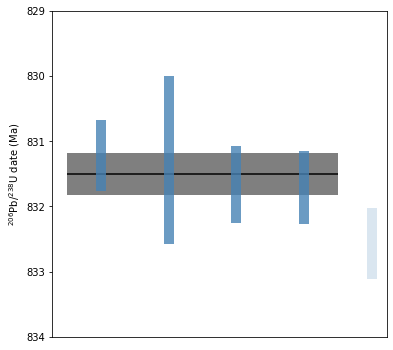

In [32]:
colors = plt.cm.viridis(np.linspace(0,1,len(sample_means)))

fig, ax = plot_dates(zircon_means, zircon_2sigmas, include, sample_means, sample_2sigmas, ['steelblue'], labels,
                     figsize=(6,6), lineweight=10, bbox_to_anchor=(0.15,1), ylim=(834,829))

ax.get_legend().remove()
ax.set_xticks([])

#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Geochron/TS01C.pdf', bbox_inches='tight')
plt.show(fig)

# 9. Tonian APWP of South China

## 9.1 Define plotting fuctions

In [2]:
# Fuction credited to Park et al. (2021)
# https://github.com/Swanson-Hysell-Group/Xiajiang_Paleomagnetism
def rotated_pole_plot(ax, plon, plat, a95, Eulers, marker, s, marker_color, a95_color, a95_alpha, a95_edge_alpha=1.0,label='',legend=False,edgecolors='k'):
    """
    Plot paleomagnetic pole with rotation.
    """
    # rotate pole
    rotated_plat = plat
    rotated_plon = plon
    for i in range(len(Eulers)):
        rotated_plat, rotated_plon = pmag.pt_rot(Eulers[i], [rotated_plat], [rotated_plon])
        rotated_plat = rotated_plat[0]
        rotated_plon = rotated_plon[0]
    
    # degrees to km conversion
    a95_km = a95 * 111.32
    
    # pole
    if legend == True:
        ax.scatter(rotated_plon, rotated_plat, marker=marker,
               color=marker_color, edgecolors=edgecolors, s=s,
               label=label, transform=ccrs.PlateCarree(),zorder=101)
    if legend == False:
        ax.scatter(rotated_plon, rotated_plat, marker=marker,
               color=marker_color, edgecolors=edgecolors, s=s,
               transform=ccrs.PlateCarree(),zorder=101)
    
    # a95
    equi_filled(ax, rotated_plon, rotated_plat, a95_km, a95_color, alpha=a95_alpha, edge_alpha=a95_edge_alpha)

In [3]:
# Fuction credited to Park et al. (2021)
# https://github.com/Swanson-Hysell-Group/Xiajiang_Paleomagnetism
def equi_filled(map_axis, centerlon, centerlat, radius, color, alpha=1.0, edge_alpha=1.0):
    """
    Modified from the ipmag function equi().
    """
    glon1 = centerlon
    glat1 = centerlat
    X = []
    Y = []
    for azimuth in range(0, 360):
        glon2, glat2, baz = ipmag.shoot(glon1, glat1, azimuth, radius)
        X.append(glon2)
        Y.append(glat2)
    X.append(X[0])
    Y.append(Y[0])
    
    X = X[::-1]
    Y = Y[::-1]
    
    XY = np.stack([X,Y],axis=1)
    
    circle_edge = patches.Polygon(XY,
                                  edgecolor=color,facecolor='none',alpha=edge_alpha,
                                  transform=ccrs.Geodetic())
    circle_face = patches.Polygon(XY,
                                  edgecolor='none',facecolor=color,alpha=alpha,
                                  transform=ccrs.Geodetic())
    
    map_axis.add_patch(circle_face)
    map_axis.add_patch(circle_edge)

In [4]:
# Fuction credited to Park et al. (2021)
# https://github.com/Swanson-Hysell-Group/Xiajiang_Paleomagnetism
def get_single_craton_XYs(gpml):
    """
    Get XY coordinates of a plate polygon from a .gpml.
    
    Parameters
    ----------
    gpml : string
        Path to .gpml file.
    """
    # namespace dictionary
    ns = {'gpml':'http://www.gplates.org/gplates',
          'gml':'http://www.opengis.net/gml'}
    
    # initial parse
    tree = ET.parse(gpml)
    root = tree.getroot()
    
    # storage
    Xs = []
    Ys = []
    
    # iterate through featureMembers
    featureMember = root.find('gml:featureMember',ns)
        
    # get child
    for child in featureMember:
        slice_ind = child.tag.find('}')
        child_root = 'gpml:' + child.tag[slice_ind+1:]

    if featureMember.find(child_root + '/gpml:outlineOf', ns)!=None:
        polygon_root = child_root + '/gpml:outlineOf'
    elif featureMember.find(child_root + '/gpml:boundary', ns)!=None:
        polygon_root = child_root + '/gpml:boundary'
    elif featureMember.find(child_root + '/gpml:unclassifiedGeometry', ns)!=None:
        polygon_root = child_root + '/gpml:unclassifiedGeometry'
    elif featureMember.find(child_root + '/gpml:centerLineOf', ns)!=None:
        polygon_root = child_root + '/gpml:centerLineOf'
    else:
        raise Exception('polygon_root undefined.')

    # get coordinates
    posList_path = polygon_root + '/gpml:ConstantValue/gpml:value/gml:Polygon/gml:exterior/gml:LinearRing/gml:posList'
    for feature_posList in featureMember.findall(posList_path,ns):
        np_posList = np.fromstring(feature_posList.text, dtype=float, sep=' ')

        # split into lat and lon
        lat_inds = np.arange(0, len(np_posList), 2, dtype=int)
        lon_inds = np.arange(1, len(np_posList), 2, dtype=int)

        feature_lat = np_posList[lat_inds]
        feature_lon = np_posList[lon_inds]

        Xs = feature_lon
        Ys = feature_lat
            
    return Xs, Ys

In [5]:
# Fuction credited to Park et al. (2021)
# https://github.com/Swanson-Hysell-Group/Xiajiang_Paleomagnetism
def get_craton_XYs(gpml, plateIDs):
    """
    Get XY coordinates of a plate polygon from a .gpml.
    
    Parameters
    ----------
    gpml : string
        Path to .gpml file.
        
    plateIDs : list
        Of plateIDs.
    """
    # namespace dictionary
    ns = {'gpml':'http://www.gplates.org/gplates',
          'gml':'http://www.opengis.net/gml'}
    
    # initial parse
    tree = ET.parse(gpml)
    root = tree.getroot()
    
    # storage
    Xs = []
    Ys = []
    
    # iterate through featureMembers
    for featureMember in root.findall('gml:featureMember',ns):
        
        # get child
        for child in featureMember:
            slice_ind = child.tag.find('}')
            child_root = 'gpml:' + child.tag[slice_ind+1:]
        
        # check plateID
        plateID_path = child_root + '/gpml:reconstructionPlateId/gpml:ConstantValue/gpml:value'
        feature_plateID = int(featureMember.find(plateID_path,ns).text)
        if feature_plateID in plateIDs:
            
            if featureMember.find(child_root + '/gpml:outlineOf', ns)!=None:
                polygon_root = child_root + '/gpml:outlineOf'
            elif featureMember.find(child_root + '/gpml:boundary', ns)!=None:
                polygon_root = child_root + '/gpml:boundary'
            elif featureMember.find(child_root + '/gpml:unclassifiedGeometry', ns)!=None:
                polygon_root = child_root + '/gpml:unclassifiedGeometry'
            elif featureMember.find(child_root + '/gpml:centerLineOf', ns)!=None:
                polygon_root = child_root + '/gpml:centerLineOf'
            else:
                raise Exception('polygon_root undefined.')
            
            # get coordinates
            posList_path = polygon_root + '/gpml:ConstantValue/gpml:value/gml:Polygon/gml:exterior/gml:LinearRing/gml:posList'
            for feature_posList in featureMember.findall(posList_path,ns):
                np_posList = np.fromstring(feature_posList.text, dtype=float, sep=' ')
            
                # split into lat and lon
                lat_inds = np.arange(0, len(np_posList), 2, dtype=int)
                lon_inds = np.arange(1, len(np_posList), 2, dtype=int)

                feature_lat = np_posList[lat_inds]
                feature_lon = np_posList[lon_inds]
            
                Xs.append(feature_lon)
                Ys.append(feature_lat)
            
    return Xs, Ys

In [6]:
# Fuction modified from Park et al. (2021)
# https://github.com/Swanson-Hysell-Group/Xiajiang_Paleomagnetism
def single_craton_plot(ax, gpml, Eulers, edgecolor, facecolor, alpha, linewidth, reverse_draw=False):
    """
    Plot cratons with rotation.
    
    Parameters
    ----------
    ax : map axis
        On which to plot.
    
    gpml : string
        Path to .gpml file.
        
    Eulers : list of lists
        Of Euler rotation parameters - if more than one given,
        the rotations will be additive.
    """
    # get cratons from .gpml
    Xs, Ys = get_single_craton_XYs(gpml)
    
    # draw in reverse
    if reverse_draw:
        Xs = np.flip(Xs)
        Ys = np.flip(Ys)
        
    # rotate craton
    rotated_Xs = np.array([])
    rotated_Ys = np.array([])
    for i in range(len(Xs)):
        this_X = [Xs[i]]
        this_Y = [Ys[i]]
        for j in range(len(Eulers)):
            this_Y, this_X = pmag.pt_rot(Eulers[j], this_Y, this_X)
        rotated_Xs = np.append(rotated_Xs, this_X)
        rotated_Ys = np.append(rotated_Ys, this_Y)
        
    # add craton
    #XY = np.stack([rotated_Xs[::-1],rotated_Ys[::-1]],axis=1)
    XY = np.stack([rotated_Xs,rotated_Ys],axis=1)
    print(XY.shape)
    poly_edge = patches.Polygon(XY,
                                edgecolor=edgecolor,facecolor='none',alpha=alpha,
                                transform=ccrs.Geodetic(), linewidth=linewidth)
    poly_face = patches.Polygon(XY,
                                edgecolor='none',facecolor=facecolor,alpha=alpha,
                                transform=ccrs.Geodetic())
    ax.add_patch(poly_face)
    ax.add_patch(poly_edge)

In [7]:
# Fuction credited to Park et al. (2021)
# https://github.com/Swanson-Hysell-Group/Xiajiang_Paleomagnetism
def craton_plot(ax, plateIDs, Eulers, edgecolor, facecolor, alpha, linewidth, reverse_draw=False):
    """
    Plot cratons with rotation.
    
    Parameters
    ----------
    ax : map axis
        On which to plot.
    
    plateIDs : list
        Of plateIDs.
        
    Eulers : list of lists
        Of Euler rotation parameters - if more than one given,
        the rotations will be additive.
    """
    # get cratons from .gpml
    gpml = '/Users/hairuo/jupyter_notebook/pmagpy_hairuo/FJS_Feb2021/Plot_plate_reconstruction/practice/Gplates/shapes_cratons.gpml'
    Xs, Ys = get_craton_XYs(gpml, plateIDs)
    
    # draw in reverse
    if reverse_draw:
        Xs = np.flip(Xs)
        Ys = np.flip(Ys)
    
    # rotate cratons
    rotated_Xs = []
    rotated_Ys = []
    for i in range(len(Xs)):
        rotated_X = np.array([])
        rotated_Y = np.array([])
        for j in range(len(Xs[i])):
            this_X = [Xs[i][j]]
            this_Y = [Ys[i][j]]
            for k in range(len(Eulers)):
                this_Y, this_X = pmag.pt_rot(Eulers[k], this_Y, this_X)
            rotated_X = np.append(rotated_X, this_X)
            rotated_Y = np.append(rotated_Y, this_Y)
        rotated_Xs.append(rotated_X)
        rotated_Ys.append(rotated_Y)
        
    # add cratons
    for i in range(len(rotated_Xs)):
        XY = np.stack([rotated_Xs[i][::-1],rotated_Ys[i][::-1]],axis=1)
        poly_edge = patches.Polygon(XY,
                                    edgecolor=edgecolor,facecolor='none',alpha=alpha,
                                    transform=ccrs.Geodetic(), linewidth=linewidth)
        poly_face = patches.Polygon(XY,
                                    edgecolor='none',facecolor=facecolor,alpha=alpha,
                                    transform=ccrs.Geodetic())
        ax.add_patch(poly_face)
        ax.add_patch(poly_edge)

## 9.2 Input South China poles

In [8]:
SCB_poles_pole_plot = pd.read_csv('data files/South China poles/SCB_poles (pole plot).csv',header=0)
SCB_poles_pole_plot

,Pole_ID,Pole_name,Age,Age_mean,Plat,Plong,A95,Euler_lat,Euler_lon,Euler_angle
0,LT_upper,Upper Liantuo Fm,<779.52 + 0.92,779.52,19.6,144.4,4.200000,-68.2634,-26.6226,60.2405
1,LT_lower,Lower Liantuo Fm,779.52 + 0.92,779.52,24.9,136.4,6.600000,-60.1930,-44.2136,61.8704
2,CJ,Chengjiang Fm,799.5 + 8.4,799.50,29.7,75.3,7.900000,-31.0633,-64.6471,81.9334
3,MDY,Madiyi Fm,804.9 + 0.99,804.90,34.7,82.0,6.700000,-27.3533,-60.0955,71.0936
4,XJ,Xiajiang Group,816-810,813.00,42.7,104.0,8.100000,-27.8028,-54.6500,64.3143
5,XF_Jing,Xiaofeng dykes (Jing et al.l 2019),821.64 + 0.2,821.64,26.1,82.1,14.600000,-30.8534,-56.4493,68.5950
6,XF_Li,Xiaofeng dykes (Li et al.l 2004),821.64 + 0.2,821.64,13.5,91.0,10.892658,0.0000,0.0000,0.0000
7,FJS,Fanjingshan dykes,832.51 + 0.32,832.51,-34.7,118.2,8.600000,48.2796,168.5842,-130.4262


In [9]:
SCB_poles_plate_plot = pd.read_csv('data files/South China poles/SCB_poles (plate plot).csv',header=0)
SCB_poles_plate_plot

,Pole_ID,Pole_name,Age,Age_mean,Plat,Plong,A95,Euler_lat,Euler_lon,Euler_angle
0,LT_upper,Upper Liantuo Fm,<779.52 + 0.92,779.52,19.6,144.4,4.200000,-68.2634,-26.6226,60.2405
1,LT_lower,Lower Liantuo Fm,779.52 + 0.92,779.52,24.9,136.4,6.600000,-60.1930,-44.2136,61.8704
2,CJ,Chengjiang Fm,799.5 + 8.4,799.50,29.7,75.3,7.900000,-31.0633,-64.6471,81.9334
3,MDY,Madiyi Fm,804.9 + 0.99,804.90,34.7,82.0,6.700000,-27.3533,-60.0955,71.0936
4,XJ,Xiajiang Group,816-810,813.00,42.7,104.0,8.100000,-27.8028,-54.6500,64.3143
5,XF_Li,Xiaofeng dykes (Jing et al.l 2019),821.64 + 0.3,821.64,13.5,91.0,10.892658,-44.8281,-56.7549,104.6960
6,FJS,Fanjingshan dykes,832.51 + 0.32,832.51,-34.7,118.2,8.600000,45.1582,171.1137,-122.9649


## 9.3 Plot Tonian APWP of South China

### (Fig. 1A)

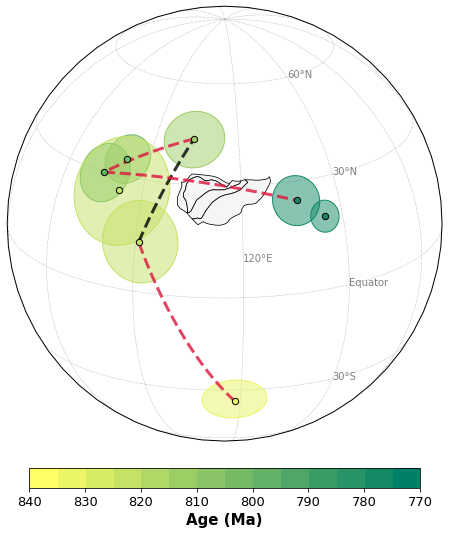

In [11]:
#Defien inputs
SCB_poles = pd.read_csv('data files/South China poles/SCB_poles (pole plot).csv',header=0)

SChina_Euler= [[0,0,0]]

# rotate SChina to India
SChina_India_Euler = [5.4029, 76.6389, 62.2534]

# Read euler poles from the csv
SCB_Euler = []
for i in range(len(SCB_poles)): 
    SCB_Euler.append([SCB_poles['Euler_lat'][i],SCB_poles['Euler_lon'][i],SCB_poles['Euler_angle'][i]])

#Age=[700,850,1] # increment is 1
#Age_range = np.arange(Age[0],Age[1]+Age[2],Age[2])
    
vmin=np.min(770)
vmax=np.max(840)

c_m = plt.get_cmap('summer',2*(len(np.arange(770,850,10))-1))

color_mapping = plt.cm.ScalarMappable(cmap = c_m,norm=plt.Normalize(vmin=vmin,vmax=vmax))
plate_colors = color_mapping.to_rgba(SCB_poles['Age_mean'])
pole_colors = color_mapping.to_rgba(SCB_poles['Age_mean'])

# Plot the map
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=115, central_latitude=20,
                                 figsize=(10,10), grid_lines=False)

lat_grid = [-80,-60,-30,0,30,60,90]
lon_grid = np.arange(-180,180+30,30)

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

#single_craton_plot(ax, '/Users/hairuo/Documents/research_applications/Gplates_elements/All Polygon/602 SCB from Li et al.(2008).gpml', 
                   #Eulers = [[0, 0, 0]], 
                   #edgecolor = 'black', 
                   #facecolor = 'none', 
                   #alpha = 1, 
                   #linewidth =1)

# plot SCB
for i in range(len(SChina_Euler)):
    craton_plot(ax, [6024], [SChina_Euler[i]], 'black', 'whitesmoke', 1.0, .75)
    craton_plot(ax, [6023], [SChina_Euler[i]], 'black', 'whitesmoke', 1.0, .75)
    craton_plot(ax, [602], [SChina_Euler[i]], 'black', 'whitesmoke', 1.0, .75)
    
# plot Baltica
#craton_plot(ax, [302], [Baltica_Laur_Euler,Laur_Euler_755],
            #'black', 'brown', 1, 0.5, reverse_draw=True)
    
cb = plt.colorbar(color_mapping, ax = ax, ticks = np.arange(770,860,10),orientation='horizontal',pad=0.05,shrink=0.7)
cb.ax.tick_params(labelsize=13)
cb.set_label(label='Age (Ma)', size=15, weight='bold')
cb.ax.invert_xaxis()

# Then plot the poles
for i in range(len(SCB_poles)):
    pole_plot = rotated_pole_plot(ax, SCB_poles['Plong'][i], SCB_poles['Plat'][i], SCB_poles['A95'][i] ,Eulers = [[0,0,0]],marker_color = pole_colors[i],s=40,
                                  marker='o',a95_color=pole_colors[i],a95_alpha=0.5,label= SCB_poles['Pole_ID'][i],legend=True)

#ax.legend(loc='lower left')

# Plot lines
plt.plot([SCB_poles[(SCB_poles['Pole_ID']=="FJS")]['Plong'].to_numpy(),SCB_poles[(SCB_poles['Pole_ID']=="XF_Li")]['Plong'].to_numpy()], 
         [SCB_poles[(SCB_poles['Pole_ID']=="FJS")]['Plat'].to_numpy(),SCB_poles[(SCB_poles['Pole_ID']=="XF_Li")]['Plat'].to_numpy()], color='crimson', linewidth=3, linestyle='--',transform=ccrs.Geodetic(),alpha=0.8) # The 1st list is [initial_point_Lon,end_point_long]; the 2nd list is [initial_point_Lat,end_point_lat]
plt.plot([SCB_poles[(SCB_poles['Pole_ID']=="XF_Li")]['Plong'].to_numpy(),SCB_poles[(SCB_poles['Pole_ID']=="XJ")]['Plong'].to_numpy()], 
         [SCB_poles[(SCB_poles['Pole_ID']=="XF_Li")]['Plat'].to_numpy(),SCB_poles[(SCB_poles['Pole_ID']=="XJ")]['Plat'].to_numpy()], color='k', linewidth=3, linestyle='--',transform=ccrs.Geodetic(),alpha=0.8)
plt.plot([SCB_poles[(SCB_poles['Pole_ID']=="XJ")]['Plong'].to_numpy(),SCB_poles[(SCB_poles['Pole_ID']=="CJ")]['Plong'].to_numpy()], 
         [SCB_poles[(SCB_poles['Pole_ID']=="XJ")]['Plat'].to_numpy(),SCB_poles[(SCB_poles['Pole_ID']=="CJ")]['Plat'].to_numpy()], color='crimson', linewidth=3, linestyle='--',transform=ccrs.Geodetic(),alpha=0.8)
plt.plot([SCB_poles[(SCB_poles['Pole_ID']=="CJ")]['Plong'].to_numpy(),SCB_poles[(SCB_poles['Pole_ID']=="LT_lower")]['Plong'].to_numpy()], 
         [SCB_poles[(SCB_poles['Pole_ID']=="CJ")]['Plat'].to_numpy(),SCB_poles[(SCB_poles['Pole_ID']=="LT_lower")]['Plat'].to_numpy()], color='crimson', linewidth=3, linestyle='--',transform=ccrs.Geodetic(),alpha=0.8)

# Lable the grids
for i in [30,60]:
    ax.text(150,i,str(i)+'°N',transform=ccrs.Geodetic(),color='grey',size=10)
ax.text(150,0,'Equator',transform=ccrs.Geodetic(),color='grey',size=10)
ax.text(150,-30,'30°S',transform=ccrs.Geodetic(),color='grey',size=10)
ax.text(120,10,'120°E',transform=ccrs.Geodetic(),color='grey',size=10)
#for i in [90,120,150]:
    #ax.text(i,-15,str(i)+'°',transform=ccrs.Geodetic(),color='grey')

#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/main_text/Fig_1/latest/original_plots/SC_poles.pdf', bbox_inches='tight')
plt.show()

## 9.4  Tonian paleogeographic model of South China

### (Fig. 1B)

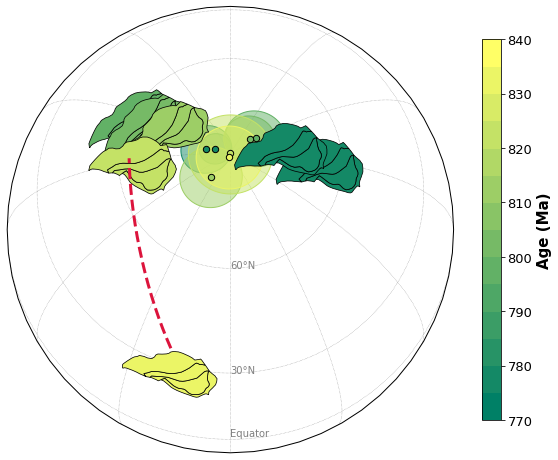

In [12]:
#Defien inputs
SCB_poles = pd.read_csv('data files/South China poles/SCB_poles (plate plot).csv',header=0)

SChina_plate_Euler= [[0,0,0],[20,20,20],[40,40,45],[40,50,70]]

# rotate SChina to India
SChina_India_Euler = [5.4029, 76.6389, 62.2534]

# Read euler poles from the csv
SCB_Euler = []
for i in range(len(SCB_poles)): 
    SCB_Euler.append([SCB_poles['Euler_lat'][i],SCB_poles['Euler_lon'][i],SCB_poles['Euler_angle'][i]])

# Setup colorbar
vmin=np.min(770)
vmax=np.max(840)

c_m = plt.get_cmap('summer',2*(len(np.arange(770,850,10))-1))

color_mapping = plt.cm.ScalarMappable(cmap = c_m,norm=plt.Normalize(vmin=vmin,vmax=vmax))
plate_colors = color_mapping.to_rgba(SCB_poles['Age_mean'])
pole_colors = color_mapping.to_rgba(SCB_poles['Age_mean'])

# Plot orthographic map
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=270, central_latitude=70,
                                 figsize=(10,10), grid_lines=False)

lat_grid = [-80,-60,-30,0,30,60,90]
lon_grid = np.arange(-180,180+30,30)

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

# Then plot some poles
for i in range(len(SCB_poles)):
    pole_plot = rotated_pole_plot(ax, SCB_poles['Plong'][i], SCB_poles['Plat'][i], SCB_poles['A95'][i] ,Eulers = [SChina_India_Euler,SCB_Euler[i]],marker_color = pole_colors[i],s=40,
                                  marker='o',a95_color=pole_colors[i],a95_alpha=0.5,label= SCB_poles['Pole_ID'][i],legend=True)

# plot SCB
for i in range(len(SCB_Euler)):
    craton_plot(ax, [6024], [SChina_India_Euler,SCB_Euler[i]], 'black', plate_colors[i], 1.0, .75)
    craton_plot(ax, [6023], [SChina_India_Euler,SCB_Euler[i]], 'black', plate_colors[i], 1.0, .75)
    craton_plot(ax, [602], [SChina_India_Euler,SCB_Euler[i]], 'black', plate_colors[i], 1.0, .75)
    
# Set colorbar
cb = plt.colorbar(color_mapping, ax = ax, ticks = np.arange(770,860,10),orientation='vertical',pad=0.05,shrink=0.7)
cb.ax.tick_params(labelsize=13)
cb.set_label(label='Age (Ma)', size=15, weight='bold')
cb.ax.invert_xaxis()

#ax.legend(loc='center left', frameon=True)

# Plot lines
plt.plot([251, 178], [35, 63], color='crimson', linewidth=3, linestyle='--',transform=ccrs.Geodetic()) # The 1st list is [initial_point_Lon,end_point_long]; the 2nd list is [initial_point_Lat,end_point_lat]

# Plot labels
for i in [30,60]:
    ax.text(270,i,str(i)+'°N',transform=ccrs.Geodetic(),color='grey',size=10)
ax.text(270,2,'Equator',transform=ccrs.Geodetic(),color='grey',size=10)

#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/main_text/Fig_1/latest/original_plots/SC_plate motion.pdf', bbox_inches='tight')
plt.show()


# 10. Total rotation of global 850–780 Ma poles 

## 10.1 Read pole data

### South China poles

In [15]:
SC_poles = pd.read_csv('data files/Total rotation poles/SC_poles (XF_Li).csv',header=0)
SC_poles

,Pole_ID,Pole_name,Plong,Plat,k,A95,Age_mean,Age_error
0,FJS,Fanjingshan sills,118.2,-34.7,50.700000,8.600000,832.51,0.32
1,XF_Li,Xiaofeng dykes (Li+ 2004),91.0,13.5,3.059106,10.892658,821.64,0.20
2,XJ,Xiajiang Group,104.0,42.7,23.000000,8.100000,813.00,3.00
3,MDY,Madiyi Fm,82.0,34.7,42.900000,6.700000,804.90,0.99
4,CJ,Chengjiang Fm,75.3,29.7,38.600000,7.900000,799.50,8.40
5,LT_lower,Lower Liantuo Fm,136.4,24.9,91.900000,6.600000,779.52,0.92


### Laurentia (Svalbard) poles

In [16]:
Lau_poles = pd.read_csv('data files/Total rotation poles/Svalbard_poles.csv',header=0)
Lau_poles

,Pole_ID,Pole_name,Plong,Plat,A95,k,N,Age_mean,Age_error,Age_min,Age_max
0,Lower Grus.,Lower Grusdievbreen Formation,204.9,19.6,10.9,39.9,4,815.0,5.0,810,820
1,Upper Grus.,Upper Grusdievbreen Formation,252.6,-1.1,6.2,84.2,5,802.5,7.5,795,810
2,Svan.,Svanbergfjellet Formation,226.8,25.9,5.8,25.2,18,785.0,5.0,790,780


### Baltica poles

In [17]:
Baltica_poles = pd.read_csv('data files/Total rotation poles/Baltica_poles_(Katav Fm).csv',header=0)
Baltica_poles

,Pole_ID,Pole_name,Plong,Plat,A95,k,N,Age_mean,Age_error,Age_max,Age_min
0,HD,Hunnedalen dykes,222.0,-41.0,10.500000,29.629630,6.0,848.0,27.0,NaN,NaN
1,KFm,Katav Fm,168.4,35.9,1.700000,378.743961,23.0,819.5,16.5,836.0,803.0
2,Inzer Fm,NaN,185.9,27.7,6.505382,NaN,NaN,NaN,NaN,NaN,NaN
3,Zilmerdak Fm,NaN,232.8,41.6,6.363961,NaN,NaN,NaN,NaN,NaN,NaN


## 10.2 Calculate total rotation

In [18]:
# South China
SC_rotation = []
SC_total_rotation = []

for i in range(len(SC_poles)):
    if i == 0:
        SC_rotation.append(0)
    else:
        SC_rotation.append(float (pmag.angle([SC_poles['Plong'][i],SC_poles['Plat'][i]] , [SC_poles['Plong'][i-1],SC_poles['Plat'][i-1]])))

for i in range(len(SC_poles)):  
    SC_total_rotation.append (sum(SC_rotation[0:i+1]))
    
# Laurentia
Lau_rotation = []
Lau_total_rotation = []

for i in range(len(Lau_poles)):
    if i == 0:
        Lau_rotation.append(0)
    else:
        Lau_rotation.append(float (pmag.angle([Lau_poles['Plong'][i],Lau_poles['Plat'][i]] , [Lau_poles['Plong'][i-1],Lau_poles['Plat'][i-1]])))

for i in range(len(Lau_poles)):  
    Lau_total_rotation.append (sum(Lau_rotation[0:i+1]))
    
# Baltica
Baltica_rotation = []
Baltica_total_rotation = []

for i in range(len(Baltica_poles)):
    if i == 0:
        Baltica_rotation.append(0)
    else:
        Baltica_rotation.append(float (pmag.angle([Baltica_poles['Plong'][i],Baltica_poles['Plat'][i]] , [Baltica_poles['Plong'][i-1],Baltica_poles['Plat'][i-1]])))

for i in range(len(Baltica_poles)):  
    Baltica_total_rotation.append (sum(Baltica_rotation[0:i+1]))

## 10.3 Plot total rotation

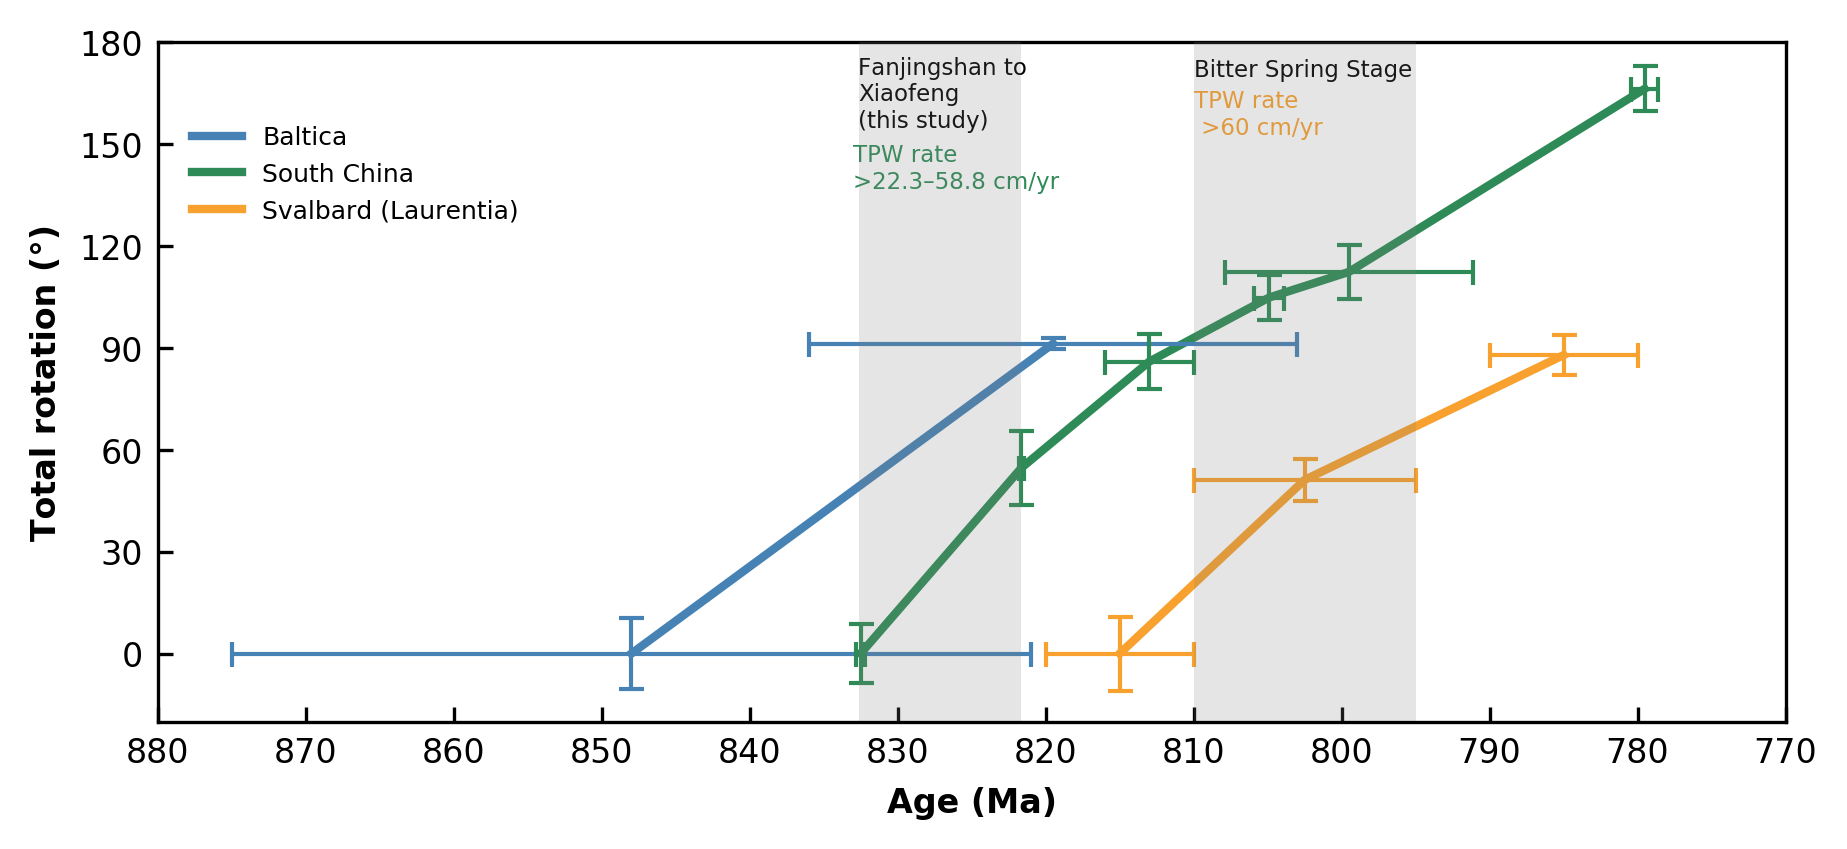

In [28]:
### Plot total rotation for the three plates
fig, (ax1) = plt.subplots(1,figsize=(7,3),dpi=300)

Baltica_color = 'steelblue'
SC_color = 'seagreen'
Lau_color = '#F9A12EFF'

# plot Baltica China data and errorbars
for i in range(len(Baltica_poles)):
    markers, caps, bars = ax1.errorbar(Baltica_poles['Age_mean'][i],Baltica_total_rotation[i],
             xerr = Baltica_poles['Age_error'][i], yerr = Baltica_poles['A95'][i] ,
             fmt = 'o',
             ms = 0,
             c = Baltica_color,
             capsize = 3,
             ecolor = Baltica_color,
             elinewidth = 1,
             markeredgewidth = 1,zorder=10)
    [bar.set_alpha(1) for bar in bars]
    [cap.set_alpha(1) for cap in caps]
ax1.plot(Baltica_poles['Age_mean'],Baltica_total_rotation,color=Baltica_color,linewidth=2, label="Baltica")

# plot South China data and errorbars
for i in range(len(SC_poles)):
    markers, caps, bars = ax1.errorbar(SC_poles['Age_mean'][i],SC_total_rotation[i],
             xerr = SC_poles['Age_error'][i], yerr = SC_poles['A95'][i] ,
             fmt = 'o',
             ms = 0,
             c = SC_color,
             capsize = 3,
             ecolor = SC_color,
             elinewidth = 1,
             markeredgewidth = 1,zorder=10)
    [bar.set_alpha(1) for bar in bars]
    [cap.set_alpha(1) for cap in caps]
ax1.plot(SC_poles['Age_mean'],SC_total_rotation,color=SC_color,linewidth=2,label="South China")

# plot Laurentia (east svalbard) data and errorbars
for i in range(len(Lau_poles)):
    markers, caps, bars = ax1.errorbar(Lau_poles['Age_mean'][i],Lau_total_rotation[i],
             xerr = Lau_poles['Age_error'][i], yerr = Lau_poles['A95'][i] ,
             fmt = 'o',
             ms = 0,
             c = Lau_color,
             capsize = 3,
             ecolor = Lau_color,
             elinewidth = 1,
             markeredgewidth = 1,zorder=10)
    [bar.set_alpha(1) for bar in bars]
    [cap.set_alpha(1) for cap in caps]
    
ax1.plot(Lau_poles['Age_mean'],Lau_total_rotation,color=Lau_color,linewidth=2,label="Svalbard (Laurentia)")

#ax1.set_xlim(xmin=770,xmax=880)
ax1.set_xticks(np.arange(770,890,10))
ax1.set_yticks(np.arange(0,180+30,30))
ax1.tick_params(direction='in',axis='both')

# Bitter spring stage
rect = patches.Rectangle((795,-20),
                         15,
                         200,
                         facecolor='C7',zorder=100,alpha=0.2)
ax1.add_patch(rect)
rect = patches.Rectangle((821.64,-20),
                         10.97,
                         200,
                         facecolor='C7',zorder=100,alpha=0.2)
ax1.add_patch(rect)

ax1.text(810,170,'Bitter Spring Stage',color='k',size=5.5)
ax1.text(810,153,'TPW rate\n >60 cm/yr',color=Lau_color,size=5.5)

ax1.text(832.7,155,'Fanjingshan to\nXiaofeng\n(this study)',color='k',size=5.5)
ax1.text(833,137,'TPW rate\n>22.3–58.8 cm/yr',color=SC_color,size=5.5)

ax1.set_xticklabels(np.arange(770,890,10),size=8)
ax1.set_yticklabels(np.arange(0,180+30,30),size=8)
ax1.set_ylim(ymax=180)
ax1.invert_xaxis()
ax1.set_xlabel('Age (Ma)',size=8,fontweight='bold')
ax1.set_ylabel('Total rotation (°)',size=8,fontweight='bold')
ax1.legend(fontsize=6,frameon=False,loc=(0.015,0.72))

#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/main_text/Fig_1/latest/original_plots/total_rotation.pdf', bbox_inches='tight')
plt.show()

# 11. Rodinia paleogeographic model (832–821 Ma)

## 11.1 Euler poles

In [29]:
# time-varying
Lau_to_mantle_835 = [-8.72055,-81.9249,-117.859] #101
Lau_to_mantle_820 = [-36.954,-96.9942,-91.2342] #101

# fixed
SCB_to_Lau = [78.0508,77.6908,54.0728] #602x
Svalbard_to_Lau = [-81,125,68] #311 
Baltica_to_Lau = [81.5,-110,-50] #301 

India_to_SCB = [5.4029, 76.6389, -62.2534] #501
Greenland_to_Lau = [68,-119,-14] #102
Siberia_to_Lau = [77,98,137] #401
NCB_to_Lau = [58,30,68] #601 [Ding+ 2021]
NAus_to_Lau = [64,113,108] #801 [Ding+ 2021]
SAus_to_NAus = [-20.0,135.0,40.0] #8011
Antarctica_to_SAus = [-3.91,37.9,30.86] #802
Tarim_to_Lau = [74, 340, 124] #605 [Ding+ 2021]
Kalahari_to_Lau = [-7.08,-37.06,-181.68] #702
RDLP_to_Lau = [-0.09,120.01,148.52] #203
Amazonia_to_Lau = [11.97,-46.01,-110.6] #201
Parana_to_Amazonia = [0.67,103.22,-30.82] #202
WAfr_to_Baltica = [1.375, 15.1585,-66.0819] #703 Antonio+ 2021

## 11.2 835 Ma reconstruction

### (Fig. 1D)

(33, 2)
(1850, 2)


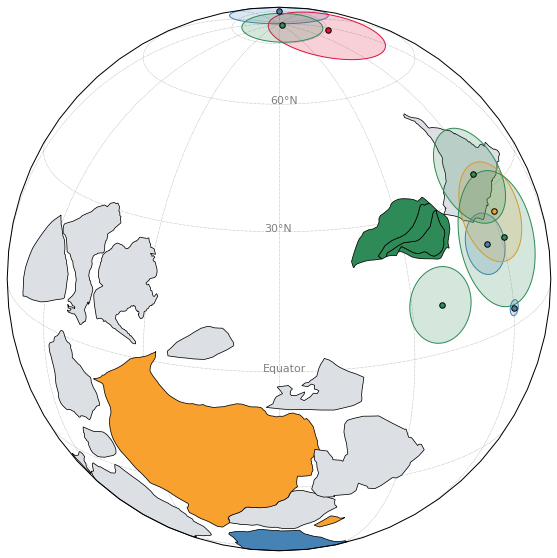

In [37]:
# Read paleomagnetic poles
SCB_poles = pd.read_csv('data files/Total rotation poles/SCB APWP_v1.1.csv',header=0)
Baltica_poles = pd.read_csv('data files/Total rotation poles/Baltica_poles_(Katav Fm).csv',header=0)
Svalbard_poles = pd.read_csv('data files/Total rotation poles/Svalbard_poles.csv',header=0)
WAfr_poles = pd.read_csv('data files/Total rotation poles/WAfr_poles.csv',header=0)

# Define plate colors
c_SCB = 'seagreen'
c_Baltica = 'steelblue'
c_Svalbard = '#F9A12EFF'
c_Laurentia = '#F9A12EFF'
c_WAfr = 'crimson'
c_else = '#dcdfe4'

# Plot the map
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=0, central_latitude=20,
                                 figsize=(10,10), grid_lines=False)

lat_grid = [-80,-60,-30,0,30,60,80,90]
lon_grid = np.arange(-180,180+30,30)

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

# Plot plates

    # SCB
craton_plot(ax, [6024], [SCB_to_Lau,Lau_to_mantle_835], 'black', c_SCB, 1.0, .75)
craton_plot(ax, [6023], [SCB_to_Lau,Lau_to_mantle_835], 'black', c_SCB, 1.0, .75)
craton_plot(ax, [602], [SCB_to_Lau,Lau_to_mantle_835], 'black', c_SCB, 1.0, .75)
    # Baltica
craton_plot(ax, [302], [Baltica_to_Lau,Lau_to_mantle_835], 'black', c_Baltica, 1.0, .75,reverse_draw=True)
    # Laurentia
craton_plot(ax, [101], [Lau_to_mantle_835], 'black', c_Svalbard, 1.0, .75,reverse_draw=False)
    # Svalbard
craton_plot(ax, [311], [Svalbard_to_Lau, Lau_to_mantle_835], 'black', c_Svalbard, 1.0, .75,reverse_draw=False)

    # elses
craton_plot(ax, [102], [Greenland_to_Lau, Lau_to_mantle_835], 'black', c_else, 1.0, .75,reverse_draw=False)
craton_plot(ax, [401], [Siberia_to_Lau,Lau_to_mantle_835], 'black', c_else, 1.0, .75,reverse_draw=True)
craton_plot(ax, [501], [India_to_SCB,SCB_to_Lau,Lau_to_mantle_835], 'black', c_else, 1.0, .75,reverse_draw=False)
craton_plot(ax, [601], [NCB_to_Lau,Lau_to_mantle_835], 'black', c_else, 1.0, .75,reverse_draw=True)
craton_plot(ax, [801], [SAus_to_NAus,NAus_to_Lau, Lau_to_mantle_835], 'black', c_else, 1.0, .75,reverse_draw=True)
craton_plot(ax, [8011], [NAus_to_Lau, Lau_to_mantle_835], 'black', c_else, 1.0, .75,reverse_draw=True)
craton_plot(ax, [802], [Antarctica_to_SAus, SAus_to_NAus,NAus_to_Lau, Lau_to_mantle_835], 'black', c_else, 1.0, .75,reverse_draw=False)
single_craton_plot(ax, '/Users/hairuo/Documents/research_applications/Gplates_elements/All Polygon/600 euroasia/605 Tarim.gpml',[Tarim_to_Lau, Lau_to_mantle_835], edgecolor = 'black', facecolor = c_else, alpha = 1,linewidth =.75)                 
craton_plot(ax, [7011], [Kalahari_to_Lau, Lau_to_mantle_835], 'black', c_else, 1.0, .75,reverse_draw=True)              
craton_plot(ax, [203], [RDLP_to_Lau, Lau_to_mantle_835], 'black', c_else, 1.0, .75,reverse_draw=False)
craton_plot(ax, [201], [Amazonia_to_Lau, Lau_to_mantle_835], 'black', c_else, 1.0, .75,reverse_draw=True)
craton_plot(ax, [202], [Parana_to_Amazonia,Amazonia_to_Lau, Lau_to_mantle_835], 'black', c_else, 1.0, .75,reverse_draw=False)  
single_craton_plot(ax, '/Users/hairuo/Documents/research_applications/Gplates_elements/All Polygon/merdith_polygons/7703_West Africa_merdith.gpml',[WAfr_to_Baltica,Baltica_to_Lau, Lau_to_mantle_835], edgecolor = 'black', facecolor = c_WAfr, alpha = 1,linewidth =.75, reverse_draw=True)     

# Plot poles

    # Baltica poles
for i in [0,1,2]:
    Baltica_pole_plot = rotated_pole_plot(ax, Baltica_poles['Plong'][i], Baltica_poles['Plat'][i], Baltica_poles['A95'][i] ,Eulers = [Baltica_to_Lau, Lau_to_mantle_835],marker_color = c_Baltica,s=30,
                                  marker='o',a95_color=c_Baltica,a95_alpha=0.2,label= Baltica_poles['Pole_ID'][i],legend=True)
    # Svalbard poles 
for i in [0]:
    Svalbard_pole_plot = rotated_pole_plot(ax, Svalbard_poles['Plong'][i], Svalbard_poles['Plat'][i], Svalbard_poles['A95'][i] ,Eulers = [Svalbard_to_Lau, Lau_to_mantle_835],marker_color = c_Laurentia,s=30,
                                  marker='o',a95_color=c_Svalbard,a95_alpha=0.2,label= Svalbard_poles['Pole_ID'][i],legend=True)
    # WAfr poles 
for i in [0]:
    WAfr_pole_plot = rotated_pole_plot(ax, WAfr_poles['Plong'][i], WAfr_poles['Plat'][i], WAfr_poles['A95'][i] ,Eulers = [WAfr_to_Baltica,Baltica_to_Lau, Lau_to_mantle_835],marker_color = c_WAfr,s=30,
                                  marker='o',a95_color=c_WAfr,a95_alpha=0.2,label= WAfr_poles['Pole_ID'][i],legend=True)
    # SCB poles
for i in [26,27,28,32]:
    SCB_pole_plot = rotated_pole_plot(ax, SCB_poles['Plong'][i], SCB_poles['Plat'][i], SCB_poles['A95'][i] ,Eulers = [SCB_to_Lau, Lau_to_mantle_835],marker_color = c_SCB,s=30,
                                  marker='o',a95_color=c_SCB,a95_alpha=0.2,label= SCB_poles['Pole_ID'][i],legend=True)
# Plot labels
for i in [30,60]:
    ax.text(-3.5,i,str(i)+'°N',transform=ccrs.Geodetic(),color='grey',size=11)
ax.text(-3.5,0,'Equator',transform=ccrs.Geodetic(),color='grey',size=11)

plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/main_text/Fig_1/latest/original_plots/Rodinia_832Ma_new.pdf', bbox_inches='tight')
plt.show()

## 11.2 821 Ma reconstruction

### (Fig. 1E)

(33, 2)
(1850, 2)


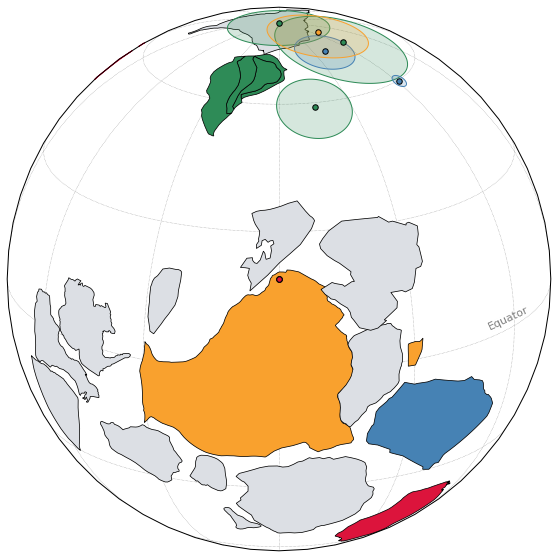

In [38]:
# Read paleomagnetic poles
SCB_poles = pd.read_csv('data files/Total rotation poles/SCB APWP_v1.1.csv',header=0)
Baltica_poles = pd.read_csv('data files/Total rotation poles/Baltica_poles_(Katav Fm).csv',header=0)
Svalbard_poles = pd.read_csv('data files/Total rotation poles/Svalbard_poles.csv',header=0)
WAfr_poles = pd.read_csv('data files/Total rotation poles/WAfr_poles.csv',header=0)

# Define plate colors
c_SCB = 'seagreen'
c_Baltica = 'steelblue'
c_Svalbard = '#F9A12EFF'
c_else = '#dcdfe4'
c_WAfr = 'crimson'

# Plot the map
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=0, central_latitude=20,
                                 figsize=(10,10), grid_lines=False)

lat_grid = [-80,-60,-30,0,30,60,90]
lon_grid = np.arange(-180,180+30,30)

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)
   
# Plot plates (820 Ma)

    # SCB
craton_plot(ax, [6024], [SCB_to_Lau,Lau_to_mantle_820], 'black', c_SCB, 1.0, .75)
craton_plot(ax, [6023], [SCB_to_Lau,Lau_to_mantle_820], 'black', c_SCB, 1.0, .75)
craton_plot(ax, [602], [SCB_to_Lau,Lau_to_mantle_820], 'black', c_SCB, 1.0, .75)
    # Baltica
craton_plot(ax, [302], [Baltica_to_Lau,Lau_to_mantle_820], 'black', c_Baltica, 1.0, .75,reverse_draw=True)
    # Laurentia
craton_plot(ax, [101], [Lau_to_mantle_820], 'black', c_Svalbard, 1.0, .75,reverse_draw=False)
    # Svalbard
craton_plot(ax, [311], [Svalbard_to_Lau, Lau_to_mantle_820], 'black', c_Svalbard, 1.0, .75,reverse_draw=False)

    # elses
craton_plot(ax, [102], [Greenland_to_Lau, Lau_to_mantle_820], 'black', c_else, 1.0, .75,reverse_draw=False)
craton_plot(ax, [401], [Siberia_to_Lau,Lau_to_mantle_820], 'black', c_else, 1.0, .75,reverse_draw=True)
craton_plot(ax, [501], [India_to_SCB,SCB_to_Lau,Lau_to_mantle_820], 'black', c_else, 1.0, .75,reverse_draw=False)
craton_plot(ax, [601], [NCB_to_Lau,Lau_to_mantle_820], 'black', c_else, 1.0, .75,reverse_draw=True)
craton_plot(ax, [801], [SAus_to_NAus,NAus_to_Lau, Lau_to_mantle_820], 'black', c_else, 1.0, .75,reverse_draw=True)
craton_plot(ax, [8011], [NAus_to_Lau, Lau_to_mantle_820], 'black', c_else, 1.0, .75,reverse_draw=True)
craton_plot(ax, [802], [Antarctica_to_SAus, SAus_to_NAus,NAus_to_Lau, Lau_to_mantle_820], 'black', c_else, 1.0, .75,reverse_draw=False)
single_craton_plot(ax, '/Users/hairuo/Documents/research_applications/Gplates_elements/All Polygon/600 euroasia/605 Tarim.gpml',[Tarim_to_Lau, Lau_to_mantle_820], edgecolor = 'black', facecolor = c_else, alpha = 1,linewidth =.75)                 
craton_plot(ax, [7011], [Kalahari_to_Lau, Lau_to_mantle_820], 'black', c_else, 1.0, .75,reverse_draw=True)              
craton_plot(ax, [203], [RDLP_to_Lau, Lau_to_mantle_820], 'black', c_else, 1.0, .75,reverse_draw=False)
craton_plot(ax, [201], [Amazonia_to_Lau, Lau_to_mantle_820], 'black', c_else, 1.0, .75,reverse_draw=True)
craton_plot(ax, [202], [Parana_to_Amazonia,Amazonia_to_Lau, Lau_to_mantle_820], 'black', c_else, 1.0, .75,reverse_draw=False)           
single_craton_plot(ax, '/Users/hairuo/Documents/research_applications/Gplates_elements/All Polygon/merdith_polygons/7703_West Africa_merdith.gpml',[WAfr_to_Baltica,Baltica_to_Lau, Lau_to_mantle_820], edgecolor = 'black', facecolor = c_WAfr, alpha = 1,linewidth =.75, reverse_draw=True)  

# Plot poles

    # SCB poles
for i in [26,27,28,32]:
    SCB_pole_plot = rotated_pole_plot(ax, SCB_poles['Plong'][i], SCB_poles['Plat'][i], SCB_poles['A95'][i] ,Eulers = [SCB_to_Lau, Lau_to_mantle_820],marker_color = c_SCB,s=30,
                                  marker='o',a95_color=c_SCB,a95_alpha=0.2,label= SCB_poles['Pole_ID'][i],legend=True)
    # Baltica poles
for i in [0,1,2]:
    Baltica_pole_plot = rotated_pole_plot(ax, Baltica_poles['Plong'][i], Baltica_poles['Plat'][i], Baltica_poles['A95'][i] ,Eulers = [Baltica_to_Lau, Lau_to_mantle_820],marker_color = c_Baltica,s=30,
                                  marker='o',a95_color=c_Baltica,a95_alpha=0.2,label= Baltica_poles['Pole_ID'][i],legend=True)    
    # WAfr poles 
for i in [0]:
    WAfr_pole_plot = rotated_pole_plot(ax, WAfr_poles['Plong'][i], WAfr_poles['Plat'][i], WAfr_poles['A95'][i] ,Eulers = [WAfr_to_Baltica,Baltica_to_Lau, Lau_to_mantle_820],marker_color = c_WAfr,s=30,
                                  marker='o',a95_color=c_WAfr,a95_alpha=0.2,label= WAfr_poles['Pole_ID'][i],legend=True)
    # Svalbard poles 
for i in [0]:
    Svalbard_pole_plot = rotated_pole_plot(ax, Svalbard_poles['Plong'][i], Svalbard_poles['Plat'][i], Svalbard_poles['A95'][i] ,Eulers = [Svalbard_to_Lau, Lau_to_mantle_820],marker_color = c_Svalbard,s=30,
                                  marker='o',a95_color=c_Svalbard,a95_alpha=0.2,label= Svalbard_poles['Pole_ID'][i],legend=True)
# plot labels
ax.text(50,2,'Equator',transform=ccrs.Geodetic(),color='grey',size=11,rotation=25)

plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/main_text/Fig_1/latest/original_plots/Rodinia_821Ma_new.pdf', bbox_inches='tight')
plt.show()

# 12. 832–821 Ma TPW rate estimated with Monte Carlo analysis 

## (Fig. 2)

In [41]:
# Fuction credited to Park et al. (2021)
# https://github.com/Swanson-Hysell-Group/Xiajiang_Paleomagnetism
def great_circle_distance(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points using the Haversine formula.
    
    Parameters
    ----------
    lon1 : float
        Longitude of point 1.
    lat1 : float
        Latitude of point 1.
    lon2 : float
        Longitude of point 2.
    lat2 : float
        Latitude of point 2.
        
    Returns
    -------
    dist : float
        Great circle distance in meters.
    """
    # mean Earth radius, in meters
    R = 6371e3
    
    # convert to radians
    lon1_rad = np.deg2rad(lon1)
    lat1_rad = np.deg2rad(lat1)
    lon2_rad = np.deg2rad(lon2)
    lat2_rad = np.deg2rad(lat2)
    
    # differences
    delta_lon = np.deg2rad(lon2 - lon1)
    delta_lat = np.deg2rad(lat2 - lat1)
    
    # haversine formula
    a = (np.sin(delta_lat/2)**2) + np.cos(lat1_rad)*np.cos(lat2_rad)*(np.sin(delta_lon/2)**2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    dist = R * c
    
    return dist

In [42]:
# Fuction credited to Park et al. (2021)
# https://github.com/Swanson-Hysell-Group/Xiajiang_Paleomagnetism
def plate_rate_mc(pole1_plon, pole1_plat, pole1_kappa, pole1_N, pole1_age, pole1_MCages,
                  pole2_plon, pole2_plat, pole2_kappa, pole2_N, pole2_age, pole2_MCages,
                  ref_loc_lon, ref_loc_lat, samplesize=10000, random_seed=None):
    """
    Determine the latitudinal motion implied by a pair of poles and utilize
    the Monte Carlo sampling method of Swanson-Hysell (2014) to determine the
    associated uncertainty.
    
    Modified from PmagPy.

    Parameters:
    ------------
    plon : longitude of pole
    plat : latitude of pole
    kappa : Fisher precision parameter for VPGs in pole
    N : number of VGPs in pole
    age : age assigned to pole in Ma
    MCages : MC sampled age distribution - must have same length as samplesize
    ref_loc_lon : longitude of reference location
    ref_loc_lat : latitude of reference location
    samplesize : number of draws from pole and age distributions (default set to 10000)
    random_seed : set random seed for reproducible number generation (default is None)

    Returns
    --------
    rate : rate of latitudinal motion in cm/yr along with estimated 2.5 and 97.5
    percentile rate estimates
    """
    angle = pmag.angle([pole1_plon,pole1_plat],[pole2_plon,pole2_plat])
    print('angular difference between the means = {:.2f}'.format(angle[0]))
    
    ref_loc = [ref_loc_lon, ref_loc_lat]
    pole1 = (pole1_plon, pole1_plat)
    pole1_paleolat = 90 - pmag.angle(pole1, ref_loc)
    pole2 = (pole2_plon, pole2_plat)
    pole2_paleolat = 90 - pmag.angle(pole2, ref_loc)
    print('paleolatitude for ref_loc resulting from the mean of pole1 = {:.2f}'.format(pole1_paleolat[0]))
    print('paleolatitude for ref_loc resulting from the mean of pole2 = {:.2f}'.format(pole2_paleolat[0]))
    rate = (great_circle_distance(0,pole1_paleolat,0,pole2_paleolat)*1e2) / ((pole1_age-pole2_age)*1e6)
    print('rate of paleolatitudinal change implied by the means = {:.2f} cm/yr'.format(rate[0]))
    plate_rate = (great_circle_distance(pole1_plon,
                                        pole1_plat,
                                        pole2_plon,
                                        pole2_plat)*1e2) / ((pole1_age-pole2_age)*1e6)
    print('plate velocity implied by the means = {:.2f} cm/yr'.format(plate_rate))

    if random_seed != None:
        np.random.seed(random_seed)

    pole1_MCpoles = []
    pole1_MCpole_lat = []
    pole1_MCpole_long = []
    pole1_MCpaleolat = []
    for n in range(samplesize):
        vgp_samples = []
        for vgp in range(pole1_N):
            # pmag.dev returns a direction from a fisher distribution with
            # specified kappa
            direction_atN = pmag.fshdev(pole1_kappa)
            # this direction is centered at latitude of 90 degrees and needs to be rotated
            # to be centered on the mean pole position
            tilt_direction = pole1_plon
            tilt_amount = 90 - pole1_plat
            direction = pmag.dotilt(direction_atN[0], direction_atN[1], tilt_direction, tilt_amount)
            vgp_samples.append([direction[0], direction[1], 1.])
        mean = pmag.fisher_mean(vgp_samples)
        mean_pole_position = (mean['dec'], mean['inc'])
        pole1_MCpoles.append([mean['dec'], mean['inc'], 1.])
        pole1_MCpole_lat.append(mean['inc'])
        pole1_MCpole_long.append(mean['dec'])
        paleolat = 90 - pmag.angle(mean_pole_position, ref_loc)
        pole1_MCpaleolat.append(paleolat[0])

    pole2_MCpoles = []
    pole2_MCpole_lat = []
    pole2_MCpole_long = []
    pole2_MCpaleolat = []
    for n in range(samplesize):
        vgp_samples = []
        for vgp in range(pole2_N):
            # pmag.dev returns a direction from a fisher distribution with
            # specified kappa
            direction_atN = pmag.fshdev(pole2_kappa)
            # this direction is centered at latitude of 90 degrees and needs to be rotated
            # to be centered on the mean pole position
            tilt_direction = pole2_plon
            tilt_amount = 90 - pole2_plat
            direction = pmag.dotilt(
                direction_atN[0], direction_atN[1], tilt_direction, tilt_amount)
            vgp_samples.append([direction[0], direction[1], 1.])
        mean = pmag.fisher_mean(vgp_samples)
        mean_pole_position = (mean['dec'], mean['inc'])
        pole2_MCpoles.append([mean['dec'], mean['inc'], 1.])
        pole2_MCpole_lat.append(mean['inc'])
        pole2_MCpole_long.append(mean['dec'])
        paleolat = 90 - pmag.angle(mean_pole_position, ref_loc)
        pole2_MCpaleolat.append(paleolat[0])

    # calculating the change in paleolatitude and angle between the Monte Carlo pairs
    MC_angular_degrees = []
    MC_angular_degrees_per_myr = []
    MC_angular_cm_per_yr = []
    MC_paleolat_degrees = []
    MC_paleolat_degrees_per_myr = []
    MC_paleolat_cm_per_yr = []

    for n in range(samplesize):
        angular_degrees = pmag.angle([pole1_MCpole_long[n],pole1_MCpole_lat[n]],
                                     [pole2_MCpole_long[n],pole2_MCpole_lat[n]])
        MC_angular_degrees.append(angular_degrees[0])
        
        paleolat_degrees = pole1_MCpaleolat[n] - pole2_MCpaleolat[n]
        MC_paleolat_degrees.append(paleolat_degrees)
        
        Delta_Myr = pole1_MCages[n] - pole2_MCages[n]
        
        angular_degrees_per_myr = angular_degrees[0] / Delta_Myr
        MC_angular_degrees_per_myr.append(angular_degrees_per_myr)
        
        angular_cm_per_yr = (great_circle_distance(pole1_MCpole_long[n],
                                                   pole1_MCpole_lat[n],
                                                   pole2_MCpole_long[n],
                                                   pole2_MCpole_lat[n])*1e2) / (Delta_Myr*1e6)
        MC_angular_cm_per_yr.append(angular_cm_per_yr)
        
        paleolat_degrees_per_myr = paleolat_degrees / Delta_Myr
        MC_paleolat_degrees_per_myr.append(paleolat_degrees_per_myr)
        
        paleolat_cm_per_yr = (great_circle_distance(0,paleolat_degrees,0,0)*1e2) / (Delta_Myr*1e6)
        MC_paleolat_cm_per_yr.append(paleolat_cm_per_yr)

    perc_02_5 = stats.scoreatpercentile(MC_paleolat_cm_per_yr, 2.5)
    perc_50_0 = stats.scoreatpercentile(MC_paleolat_cm_per_yr, 50)
    perc_97_5 = stats.scoreatpercentile(MC_paleolat_cm_per_yr, 97.5)
    
    output = pd.DataFrame({'pole1_MC_ages':pole1_MCages,
                           'pole2_MC_ages':pole2_MCages,
                           'pole1_MC_plat':pole1_MCpole_lat,
                           'pole1_MC_plon':pole1_MCpole_long,
                           'pole1_MC_paleolat':pole1_MCpaleolat,
                           'pole2_MC_plat':pole2_MCpole_lat,
                           'pole2_MC_plon':pole2_MCpole_long,
                           'pole2_MC_paleolat':pole2_MCpaleolat,
                           'angular_degrees':MC_angular_degrees,
                           'angular_degrees_per_myr':MC_angular_degrees_per_myr,
                           'angular_cm_per_yr':MC_angular_cm_per_yr,
                           'paleolat_degrees':MC_paleolat_degrees,
                           'paleolat_degrees_per_myr':MC_paleolat_degrees_per_myr,
                           'paleolat_cm_per_yr':MC_paleolat_cm_per_yr,})
    
    return output

samplesize=10000

In [43]:
# Fuction modified from Park et al. (2021)
# https://github.com/Swanson-Hysell-Group/Xiajiang_Paleomagnetism
def plate_rate_mc_tec_corr(pole1_plon, pole1_plat, pole1_kappa, pole1_N, pole1_age, pole1_MCages,pole1_MCdiff_1,pole1_MCdiff_2,
                  pole2_plon, pole2_plat, pole2_kappa, pole2_N, pole2_age, pole2_MCages,
                  ref_loc_lon, ref_loc_lat, samplesize=10000, random_seed=None):
    """
    Determine the latitudinal motion implied by a pair of poles and utilize
    the Monte Carlo sampling method of Swanson-Hysell (2014) to determine the
    associated uncertainty.
    
    Modified from PmagPy.

    Parameters:
    ------------
    plon : longitude of pole
    plat : latitude of pole
    kappa : Fisher precision parameter for VPGs in pole
    N : number of VGPs in pole
    age : age assigned to pole in Ma
    MCages : MC sampled age distribution - must have same length as samplesize
    ref_loc_lon : longitude of reference location
    ref_loc_lat : latitude of reference location
    samplesize : number of draws from pole and age distributions (default set to 10000)
    random_seed : set random seed for reproducible number generation (default is None)

    Returns
    --------
    rate : rate of latitudinal motion in cm/yr along with estimated 2.5 and 97.5
    percentile rate estimates
    """
    angle = pmag.angle([pole1_plon,pole1_plat],[pole2_plon,pole2_plat])
    print('angular difference between the means = {:.2f}'.format(angle[0]))
    
    ref_loc = [ref_loc_lon, ref_loc_lat]
    pole1 = (pole1_plon, pole1_plat)
    pole1_paleolat = 90 - pmag.angle(pole1, ref_loc)
    pole2 = (pole2_plon, pole2_plat)
    pole2_paleolat = 90 - pmag.angle(pole2, ref_loc)
    print('paleolatitude for ref_loc resulting from the mean of pole1 = {:.2f}'.format(pole1_paleolat[0]))
    print('paleolatitude for ref_loc resulting from the mean of pole2 = {:.2f}'.format(pole2_paleolat[0]))
    rate = (great_circle_distance(0,pole1_paleolat,0,pole2_paleolat)*1e2) / ((pole1_age-pole2_age)*1e6)
    print('rate of paleolatitudinal change implied by the means = {:.2f} cm/yr'.format(rate[0]))
    plate_rate = (great_circle_distance(pole1_plon,
                                        pole1_plat,
                                        pole2_plon,
                                        pole2_plat)*1e2) / ((pole1_age-pole2_age)*1e6)
    print('plate velocity implied by the means = {:.2f} cm/yr'.format(plate_rate))

    if random_seed != None:
        np.random.seed(random_seed)

    pole1_MCpoles = []
    pole1_MCpole_lat = []
    pole1_MCpole_long = []
    pole1_MCpaleolat = []
    for n in range(samplesize):
        vgp_samples = []
        for vgp in range(pole1_N):
            # pmag.dev returns a direction from a fisher distribution with
            # specified kappa
            direction_atN = pmag.fshdev(pole1_kappa)
            # this direction is centered at latitude of 90 degrees and needs to be rotated
            # to be centered on the mean pole position
            tilt_direction = pole1_plon
            tilt_amount = 90 - pole1_plat
            
            'Start of Hairuo part of modification'
            tectonic_direction_1 = np.random.uniform(0, 360, samplesize)
            tectonic_amount_1 = ((pole1_MCdiff_1/11.1)*(pole1_MCages - pole2_MCages))
            
            tectonic_direction_2 = np.random.uniform(0, 360, samplesize)
            tectonic_amount_2 = ((pole1_MCdiff_2/11.1)*(pole1_MCages - pole2_MCages))
            
            #direction change step(1)
            direction_1 = pmag.dotilt(
                direction_atN[0], direction_atN[1], tilt_direction, tilt_amount)
            
            #direction change step(2)
            direction_2 = pmag.dotilt(
                direction_1[0], direction_1[1], tectonic_direction_1[n], tectonic_amount_1[n])
            
            #direction change step(3)
            direction_3 = pmag.dotilt(
                direction_2[0], direction_2[1], tectonic_direction_2[n], tectonic_amount_2[n])
            
            vgp_samples.append([direction_3[0], direction_3[1], 1.])
            'End of Hairuo modification'
            
        mean = pmag.fisher_mean(vgp_samples)
        mean_pole_position = (mean['dec'], mean['inc'])
        pole1_MCpoles.append([mean['dec'], mean['inc'], 1.])
        pole1_MCpole_lat.append(mean['inc'])
        pole1_MCpole_long.append(mean['dec'])
        paleolat = 90 - pmag.angle(mean_pole_position, ref_loc)
        pole1_MCpaleolat.append(paleolat[0])

    pole2_MCpoles = []
    pole2_MCpole_lat = []
    pole2_MCpole_long = []
    pole2_MCpaleolat = []
    for n in range(samplesize):
        vgp_samples = []
        for vgp in range(pole2_N):
            # pmag.dev returns a direction from a fisher distribution with
            # specified kappa
            direction_atN = pmag.fshdev(pole2_kappa)
            # this direction is centered at latitude of 90 degrees and needs to be rotated
            # to be centered on the mean pole position
            tilt_direction = pole2_plon
            tilt_amount = 90 - pole2_plat
            direction = pmag.dotilt(
                direction_atN[0], direction_atN[1], tilt_direction, tilt_amount)
            vgp_samples.append([direction[0], direction[1], 1.])
            
        mean = pmag.fisher_mean(vgp_samples)
        mean_pole_position = (mean['dec'], mean['inc'])
        pole2_MCpoles.append([mean['dec'], mean['inc'], 1.])
        pole2_MCpole_lat.append(mean['inc'])
        pole2_MCpole_long.append(mean['dec'])
        paleolat = 90 - pmag.angle(mean_pole_position, ref_loc)
        pole2_MCpaleolat.append(paleolat[0])

    # calculating the change in paleolatitude and angle between the Monte Carlo pairs
    MC_angular_degrees = []
    MC_angular_degrees_per_myr = []
    MC_angular_cm_per_yr = []
    MC_paleolat_degrees = []
    MC_paleolat_degrees_per_myr = []
    MC_paleolat_cm_per_yr = []

    for n in range(samplesize):
        
        angular_degrees = pmag.angle([pole1_MCpole_long[n],pole1_MCpole_lat[n]],
                                     [pole2_MCpole_long[n],pole2_MCpole_lat[n]])
        MC_angular_degrees.append(angular_degrees[0])
        
        paleolat_degrees = pole1_MCpaleolat[n] - pole2_MCpaleolat[n]
        MC_paleolat_degrees.append(paleolat_degrees)
        
        Delta_Myr = pole1_MCages[n] - pole2_MCages[n]
        
        angular_degrees_per_myr = angular_degrees[0] / Delta_Myr
        MC_angular_degrees_per_myr.append(angular_degrees_per_myr)
        
        angular_cm_per_yr = (great_circle_distance(pole1_MCpole_long[n],
                                                   pole1_MCpole_lat[n],
                                                   pole2_MCpole_long[n],
                                                   pole2_MCpole_lat[n])*1e2) / (Delta_Myr*1e6)
        MC_angular_cm_per_yr.append(angular_cm_per_yr)
        
        paleolat_degrees_per_myr = paleolat_degrees / Delta_Myr
        MC_paleolat_degrees_per_myr.append(paleolat_degrees_per_myr)
        
        paleolat_cm_per_yr = (great_circle_distance(0,paleolat_degrees,0,0)*1e2) / (Delta_Myr*1e6)
        MC_paleolat_cm_per_yr.append(paleolat_cm_per_yr)

    perc_02_5 = stats.scoreatpercentile(MC_paleolat_cm_per_yr, 2.5)
    perc_50_0 = stats.scoreatpercentile(MC_paleolat_cm_per_yr, 50)
    perc_97_5 = stats.scoreatpercentile(MC_paleolat_cm_per_yr, 97.5)
    
    output = pd.DataFrame({'pole1_MC_ages':pole1_MCages,
                           'pole2_MC_ages':pole2_MCages,
                           'pole1_MC_plat':pole1_MCpole_lat,
                           'pole1_MC_plon':pole1_MCpole_long,
                           'pole1_MC_paleolat':pole1_MCpaleolat,
                           'pole2_MC_plat':pole2_MCpole_lat,
                           'pole2_MC_plon':pole2_MCpole_long,
                           'pole2_MC_paleolat':pole2_MCpaleolat,
                           'angular_degrees':MC_angular_degrees,
                           'angular_degrees_per_myr':MC_angular_degrees_per_myr,
                           'angular_cm_per_yr':MC_angular_cm_per_yr,
                           'paleolat_degrees':MC_paleolat_degrees,
                           'paleolat_degrees_per_myr':MC_paleolat_degrees_per_myr,
                           'paleolat_cm_per_yr':MC_paleolat_cm_per_yr,})
    
    return output

samplesize=10000

## 12.1 Read FJS and XF data

In [44]:
SC_poles = pd.read_csv('data files/Total rotation poles/SC_poles (XF_Li).csv',header=0)
SC_poles

,Pole_ID,Pole_name,Plong,Plat,k,A95,Age_mean,Age_error
0,FJS,Fanjingshan sills,118.2,-34.7,50.700000,8.600000,832.51,0.32
1,XF_Li,Xiaofeng dykes (Li+ 2004),91.0,13.5,3.059106,10.892658,821.64,0.20
2,XJ,Xiajiang Group,104.0,42.7,23.000000,8.100000,813.00,3.00
3,MDY,Madiyi Fm,82.0,34.7,42.900000,6.700000,804.90,0.99
4,CJ,Chengjiang Fm,75.3,29.7,38.600000,7.900000,799.50,8.40
5,LT_lower,Lower Liantuo Fm,136.4,24.9,91.900000,6.600000,779.52,0.92


## 12.2 Rate of latitudinal change calculated with full error propagation

In [45]:
'Calculate the rate of latitudinal motions inferred from FJS-XF (Li 2004) poles'

# FJS pole: (118.5°E, -35.7°, A95 = 8.9, N = 7, age- 832.51+0.32) 
# Xiaofeng pole (Li 2004): ( 91.0E, 13.5N, dp=10.5, dm=11.3, A95=10.9 , age- 821.64 + 0.2)
# Xiaofeng pole (Jing 2019): (82.1E, 26.1N, A95=14.6, age- 821.64 + 0.2)

# Calculate the 95CI of FJS Plat
plat_FJS = -26.73766034840534
A95_FJS = 8.6

# Calculate the Plat of the FJS sampling site using XF (Li 2004) pole
dir_XF_Li = pmag.vgp_di(13.5,91,27.92,108.69)
plat_XF_Li = pmag.plat(dir_XF_Li[1])
A95_XF_Li = 10.9

# Lat differece in degrees
lat_diff= np.abs(np.abs(plat_FJS)-np.abs(plat_XF_Li))
lat_diff_2e = np.sqrt(A95_FJS**2+A95_XF_Li**2)
lat_upper = lat_diff + lat_diff_2e
lat_lower = lat_diff - lat_diff_2e

print('Paleo-latitudes between FJS&XF (Li) with 2e ',lat_lower,lat_diff,lat_upper)

# Time between FJS and YB poles
time_mean=832.51-821.64
time_2e = np.sqrt(0.32**2+0.2**2)

time_upper=time_mean+time_2e
time_lower=time_mean-time_2e

print('Time between FJS&XF (Li) with 95 CI in Myr ',time_lower,time_mean,time_upper)

# Maxium and minimum rate in degree
mean_rate= lat_diff/time_mean
maximum_rate=mean_rate + mean_rate*np.sqrt((lat_diff_2e/lat_diff)**2+(time_2e/time_mean)**2)
minimum_rate=mean_rate - mean_rate*np.sqrt((lat_diff_2e/lat_diff)**2+(time_2e/time_mean)**2)

print ('Plat rate in degree/Myr ',minimum_rate,mean_rate,maximum_rate)
print ('Plat rate error in degree/Myr ',minimum_rate-mean_rate,maximum_rate-mean_rate)

# Maxium and minimum rate in cm/Myr
Earth_r=6371 #km

maximum_cm=(maximum_rate*np.pi/180)*Earth_r*1e05/1e06
minimum_cm=(minimum_rate*np.pi/180)*Earth_r*1e05/1e06
mean_cm= (mean_rate*np.pi/180)*Earth_r*1e05/1e06

print('Plat rate in cm/yr ',minimum_cm, mean_cm, maximum_cm)
print('Plat rate error in cm/yr ', minimum_cm-mean_cm, maximum_cm-mean_cm)

Paleo-latitudes between FJS&XF (Li) with 2e  27.483233488905988 41.36739712954348 55.251560770180966
Time between FJS&XF (Li) with 95 CI in Myr  10.49264075471774 10.870000000000005 11.247359245282269
Plat rate in degree/Myr  2.521541892579913 3.8056483099855987 5.089754727391284
Plat rate error in degree/Myr  -1.2841064174056855 1.2841064174056855
Plat rate in cm/yr  28.038266577660522 42.316878466383756 56.59549035510698
Plat rate error in cm/yr  -14.278611888723233 14.278611888723226


## 12.3 Rate of latitudinal change calculated with Monte Carlo approach

In [46]:
# Between the FJS to XF (Li et al. 2004)
np.random.seed(2020)

pole1_plon = SC_poles['Plong'][0]
pole1_plat = SC_poles['Plat'][0]
pole1_kappa = SC_poles['k'][0]
pole1_N = 7
pole1_age = SC_poles['Age_mean'][0]
pole1_age_error = SC_poles['Age_error'][0]/2
pole1_MCages = np.random.normal(pole1_age, pole1_age_error, samplesize)

pole2_plon = SC_poles['Plong'][1]
pole2_plat = SC_poles['Plat'][1]
pole2_kappa = SC_poles['k'][1]
pole2_N = 54
pole2_age = SC_poles['Age_mean'][1]
pole2_age_error = SC_poles['Age_error'][1]/2
pole2_MCages = np.random.normal(pole2_age, pole2_age_error, samplesize)

FJS_XF = plate_rate_mc(pole1_plon,pole1_plat,pole1_kappa,pole1_N,pole1_age,pole1_MCages,
                      pole2_plon,pole2_plat,pole2_kappa,pole2_N,pole2_age,pole2_MCages,
                      108.69,27.92,
                      samplesize=samplesize, random_seed=2020)

angular difference between the means = 54.68
paleolatitude for ref_loc resulting from the mean of pole1 = 26.74
paleolatitude for ref_loc resulting from the mean of pole2 = 68.11
rate of paleolatitudinal change implied by the means = 42.32 cm/yr
plate velocity implied by the means = 55.94 cm/yr


## 12.4 Rate of latitudinal change calculated with Monte Carlo approach (simulate and subtract tectonic motions)

In [22]:
# Between the FJS to XF (Li et al. 2004)
np.random.seed(2020)

pole1_plon = SC_poles['Plong'][0]
pole1_plat = SC_poles['Plat'][0]
pole1_kappa = SC_poles['k'][0]
pole1_N = 7
pole1_age = SC_poles['Age_mean'][0]
pole1_age_error = SC_poles['Age_error'][0]/2
pole1_MCages = np.random.normal(pole1_age, pole1_age_error, samplesize)

pole2_plon = SC_poles['Plong'][1]
pole2_plat = SC_poles['Plat'][1]
pole2_kappa = SC_poles['k'][1]
pole2_N = 54
pole2_age = SC_poles['Age_mean'][1]
pole2_age_error = SC_poles['Age_error'][1]/2
pole2_MCages = np.random.normal(pole2_age, pole2_age_error, samplesize)

pole1_MCdiff_1 = np.random.normal(25, 3.5, samplesize)
pole1_MCdiff_2 = np.repeat(0, samplesize)

FJS_XF_one_plate = plate_rate_mc_tec_corr(pole1_plon,pole1_plat,pole1_kappa,pole1_N,pole1_age,pole1_MCages,pole1_MCdiff_1,pole1_MCdiff_2,
                      pole2_plon,pole2_plat,pole2_kappa,pole2_N,pole2_age,pole2_MCages,
                      108.69,27.92,
                      samplesize=samplesize, random_seed=2020)

angular difference between the means = 54.68
paleolatitude for ref_loc resulting from the mean of pole1 = 26.74
paleolatitude for ref_loc resulting from the mean of pole2 = 68.11
rate of paleolatitudinal change implied by the means = 42.32 cm/yr
plate velocity implied by the means = 55.94 cm/yr


## 12.4 Plot Monte Carlo results (assuming no tectonic motions)

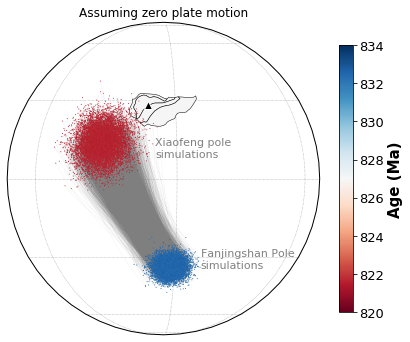

In [23]:
SCB_poles = pd.read_csv('data files/Total rotation poles/SC_poles (XF_Li).csv',header=0)
SChina_Euler= [[0,0,0]]

lat_grid = [-80,-60,-30,0,30,60,80]
lon_grid = np.arange(-180,180+60,60)

ax = ipmag.make_orthographic_map(add_land=False, central_longitude=115, central_latitude=0,
                                 figsize=(7,7), grid_lines=False)

ax.add_feature(cartopy.feature.LAND, zorder=-99,
               facecolor='#dddddd', edgecolor='none')

# Colorbar
vmin=np.min(820)
vmax=np.max(834)

c_m = plt.get_cmap('RdBu')

color_mapping = plt.cm.ScalarMappable(cmap = c_m,norm=plt.Normalize(vmin=vmin,vmax=vmax))
pole1_colors = color_mapping.to_rgba(FJS_XF['pole1_MC_ages'])
pole2_colors = color_mapping.to_rgba(FJS_XF['pole2_MC_ages'])

# plot SCB
for i in range(1):
    craton_plot(ax, [6024], SChina_Euler, 'black', 'whitesmoke', 1.0, 0.5)
    craton_plot(ax, [6023], SChina_Euler, 'black', 'whitesmoke', 1.0, 0.5)
    craton_plot(ax, [602], SChina_Euler, 'black', 'whitesmoke', 1.0, 0.5)
    
ax.scatter(108.69,27.92,transform=ccrs.PlateCarree(), c='k',edgecolor='white',marker='^',zorder=200, s=8**2)

# Plot simulated VGPs
ipmag.plot_vgp(ax, FJS_XF['pole1_MC_plon'], FJS_XF['pole1_MC_plat'], color=pole1_colors, edge='none', markersize=1)
ipmag.plot_vgp(ax, FJS_XF['pole2_MC_plon'], FJS_XF['pole2_MC_plat'], color=pole2_colors, edge='none', markersize=1)

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)
ax.set_title('Assuming zero plate motion')

# Calculate the mean and A95 of simulations and plot
#New_pole_1 = ipmag.fisher_mean(dec = FJS_XF['pole1_MC_plon'], inc = FJS_XF['pole1_MC_plat'])
#New_pole_2 = ipmag.fisher_mean(dec = FJS_XF['pole2_MC_plon'], inc = FJS_XF['pole2_MC_plat'])

#pole_plot_1 = rotated_pole_plot(ax, New_pole_1['dec'], New_pole_1['inc'], New_pole_1['alpha95'] ,Eulers = [[0,0,0]],marker_color = 'white',s=10,
#                                  marker='o',a95_color='white',a95_alpha=0,legend=False,edgecolors='none')
#pole_plot_2 = rotated_pole_plot(ax, New_pole_2['dec'], New_pole_2['inc'], New_pole_2['alpha95'] ,Eulers = [[0,0,0]],marker_color = 'white',s=10,
#                                  marker='o',a95_color='white',a95_alpha=0,legend=False,edgecolors='none')

# Label
ax.text(132,-35,'Fanjingshan Pole\nsimulations',transform=ccrs.Geodetic(),color='grey',size=11)
ax.text(112,8,'Xiaofeng pole\nsimulations',transform=ccrs.Geodetic(),color='grey',size=11)

# plot lines
ax.plot([FJS_XF['pole1_MC_plon'],FJS_XF['pole2_MC_plon']],
           [FJS_XF['pole1_MC_plat'],FJS_XF['pole2_MC_plat']],
           c='C7', linewidth=0.1, zorder=0, alpha=0.4,transform=ccrs.Geodetic())

# Color bar
cb = plt.colorbar(color_mapping, ax = ax, ticks = np.arange(820,835,2),orientation='vertical',pad=0.05,shrink=0.7)
cb.ax.tick_params(labelsize=13)
cb.set_label(label='Age (Ma)', size=15, weight='bold')
cb.ax.invert_xaxis()

plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/main_text/Fig_2/July_2021/original materials/FJS-XF_(1).pdf', bbox_inches='tight')
plt.show(fig)

## 12.4 Plot Monte Carlo results (assuming maximum tectonic motions)

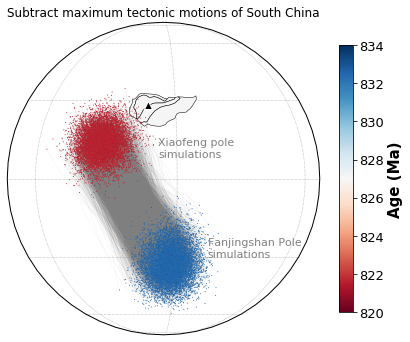

In [24]:
SCB_poles = pd.read_csv('data files/Total rotation poles/SC_poles (XF_Li).csv',header=0)
SChina_Euler= [[0,0,0]]

lat_grid = [-80,-60,-30,0,30,60,80]
lon_grid = np.arange(-180,180+60,60)

ax = ipmag.make_orthographic_map(add_land=False, central_longitude=115, central_latitude=0,
                                 figsize=(7,7), grid_lines=False)

ax.add_feature(cartopy.feature.LAND, zorder=-99,
               facecolor='#dddddd', edgecolor='none')

# Colorbar
vmin=np.min(820)
vmax=np.max(834)

c_m = plt.get_cmap('RdBu')

color_mapping = plt.cm.ScalarMappable(cmap = c_m,norm=plt.Normalize(vmin=vmin,vmax=vmax))
pole1_colors = color_mapping.to_rgba(FJS_XF_one_plate['pole1_MC_ages'])
pole2_colors = color_mapping.to_rgba(FJS_XF_one_plate['pole2_MC_ages'])

# plot SCB
for i in range(1):
    craton_plot(ax, [6024], [[0,0,0]], 'black', 'whitesmoke', 1.0, 0.5)
    craton_plot(ax, [6023], [[0,0,0]], 'black', 'whitesmoke', 1.0, 0.5)
    craton_plot(ax, [602], [[0,0,0]], 'black', 'whitesmoke', 1.0, 0.5)

# Plot
ipmag.plot_vgp(ax, FJS_XF_one_plate['pole1_MC_plon'], FJS_XF_one_plate['pole1_MC_plat'], color=pole1_colors, edge='none', markersize=1)
ipmag.plot_vgp(ax, FJS_XF_one_plate['pole2_MC_plon'], FJS_XF_one_plate['pole2_MC_plat'], color=pole2_colors, edge='none', markersize=1)

ax.scatter(108.69,27.92,transform=ccrs.PlateCarree(), c='k',edgecolor='white',marker='^',zorder=200, s=8**2)

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

# Calculate the mean and A95 of simulations and plot
#New_pole_1 = ipmag.fisher_mean(dec = FJS_XF_one_plate['pole1_MC_plon'], inc = FJS_XF_one_plate['pole1_MC_plat'])
#New_pole_2 = ipmag.fisher_mean(dec = FJS_XF_one_plate['pole2_MC_plon'], inc = FJS_XF_one_plate['pole2_MC_plat'])

#pole_plot_1 = rotated_pole_plot(ax, New_pole_1['dec'], New_pole_1['inc'], New_pole_1['alpha95'] ,Eulers = [[0,0,0]],marker_color = 'white',s=10,
#                                  marker='o',a95_color='white',a95_alpha=0,legend=False,edgecolors='none')
#pole_plot_2 = rotated_pole_plot(ax, New_pole_2['dec'], New_pole_2['inc'], New_pole_2['alpha95'] ,Eulers = [[0,0,0]],marker_color = 'white',s=10,
#                                  marker='o',a95_color='white',a95_alpha=0,legend=False,edgecolors='none')

# Label
ax.text(134,-30,'Fanjingshan Pole\nsimulations',transform=ccrs.Geodetic(),color='grey',size=11)
ax.text(113,8,'Xiaofeng pole\nsimulations',transform=ccrs.Geodetic(),color='grey',size=11)
#ax.text(112,30,'Reference point',transform=ccrs.Geodetic(),color='black',size=10)

# plot lines
ax.plot([FJS_XF_one_plate['pole1_MC_plon'],FJS_XF_one_plate['pole2_MC_plon']],
           [FJS_XF_one_plate['pole1_MC_plat'],FJS_XF_one_plate['pole2_MC_plat']],
           c='C7', linewidth=0.1, zorder=0, alpha=0.4,transform=ccrs.Geodetic())

ax.set_title('Subtract maximum tectonic motions of South China')
# Color bar
cb = plt.colorbar(color_mapping, ax = ax, ticks = np.arange(820,835,2),orientation='vertical',pad=0.05,shrink=0.7)
cb.ax.tick_params(labelsize=13)
cb.set_label(label='Age (Ma)', size=15, weight='bold')
cb.ax.invert_xaxis()

#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/main_text/Fig_2/July_2021/original materials/FJS-XF_(2).pdf', bbox_inches='tight')
plt.show(fig)

## 12.5 Summary figure

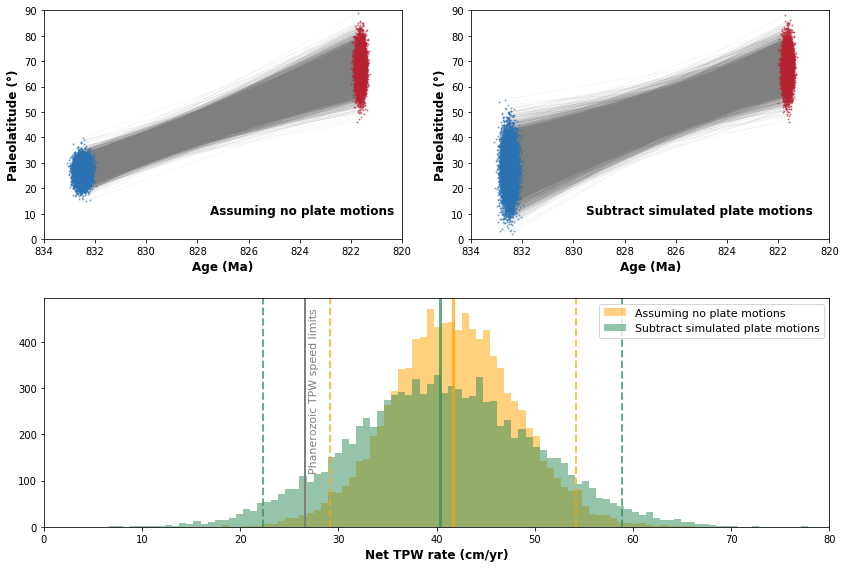

In [34]:
alpha = 0.5

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(12)

# Colorbar
vmin=np.min(820)
vmax=np.max(834)

c_m = plt.get_cmap('RdBu')

color_mapping = plt.cm.ScalarMappable(cmap = c_m,norm=plt.Normalize(vmin=vmin,vmax=vmax))
pole1_colors = color_mapping.to_rgba(FJS_XF['pole1_MC_ages'])
pole2_colors = color_mapping.to_rgba(FJS_XF['pole2_MC_ages'])

# Subplots original latitude
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1)

ax1.scatter(FJS_XF['pole1_MC_ages'], FJS_XF['pole1_MC_paleolat'], s=1, color=pole1_colors[0], alpha=0.5)
ax1.scatter(FJS_XF['pole2_MC_ages'], FJS_XF['pole2_MC_paleolat'], s=1, color=pole2_colors[0], alpha=0.5)
ax1.plot([FJS_XF['pole1_MC_ages'],FJS_XF['pole2_MC_ages']],
           [FJS_XF['pole1_MC_paleolat'],FJS_XF['pole2_MC_paleolat']],
           c='C7', linewidth=0.1, zorder=-99, alpha=0.5)

ax1.set_xlabel('Age (Ma)', fontweight='bold',size=12)
ax1.set_ylabel('Paleolatitude (°)',fontweight='bold',size=12)
ax1.set_xticks(np.arange(820,834+2,2))
ax1.set_xlim(820,834)
ax1.set_ylim(0,90)
ax1.text(827.5,10,'Assuming no plate motions',color='k',size=12,fontweight='bold')
#ax[0].legend(fontsize=11)
ax1.invert_xaxis()

# Subplots plate-subtracted latitude
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1)

ax2.scatter(FJS_XF_one_plate['pole1_MC_ages'], FJS_XF_one_plate['pole1_MC_paleolat'], s=1, color=pole1_colors[0], alpha=0.5)
ax2.scatter(FJS_XF_one_plate['pole2_MC_ages'], FJS_XF_one_plate['pole2_MC_paleolat'], s=1, color=pole2_colors[0], alpha=0.5)
ax2.plot([FJS_XF_one_plate['pole1_MC_ages'],FJS_XF['pole2_MC_ages']],
           [FJS_XF_one_plate['pole1_MC_paleolat'],FJS_XF_one_plate['pole2_MC_paleolat']],
           c='C7', linewidth=0.1, zorder=-99, alpha=0.5)

ax2.set_xlabel('Age (Ma)', fontweight='bold',size=12)
ax2.set_ylabel('Paleolatitude (°)',fontweight='bold',size=12)
ax2.set_xticks(np.arange(820,834+2,2))
ax2.set_xlim(820,834)
ax2.set_ylim(0,90)
ax2.text(829.5,10,'Subtract simulated plate motions',color='k',size=12,fontweight='bold')
#ax[0].legend(fontsize=11)
ax2.invert_xaxis()

# Subplots latitude difference
#ax2 = plt.subplot2grid((3, 2), (1, 0), colspan=2)

#bins = np.linspace(np.min([abs(FJS_XF_one_plate['paleolat_degrees']),abs(FJS_XF_one_plate['paleolat_degrees'])]),
                   #np.max([abs(FJS_XF_one_plate['paleolat_degrees']),abs(FJS_XF_one_plate['paleolat_degrees'])]),
                   #100)
#ax2.hist(abs(FJS_XF['paleolat_degrees']), color='orange', alpha=alpha, bins=bins, label='Subtract no plate motion',size=11)
#ax2.hist(abs(FJS_XF_one_plate['paleolat_degrees']), color='seagreen', alpha=alpha, bins=bins, label='Subtract simulated plate motions',size=11)

#ax2.legend(fontsize=9)
#ax2.set_xlabel('Paleolatitude difference (°)', fontweight='bold', size=12)


# Subplots latitude rate

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

bins = np.linspace(np.min([FJS_XF['paleolat_cm_per_yr'],FJS_XF_one_plate['paleolat_cm_per_yr']]),
                   np.max([FJS_XF['paleolat_cm_per_yr'],FJS_XF_one_plate['paleolat_cm_per_yr']]),
                   100)

ax3.hist(FJS_XF['paleolat_cm_per_yr'], color='orange', alpha=alpha, bins=bins, label='Assuming no plate motions')
ax3.hist(FJS_XF_one_plate['paleolat_cm_per_yr'], color='seagreen', alpha=alpha, bins=bins, label='Subtract simulated plate motions')

ax3.axvline(2.4*11.1, c='C7', ls='-',linewidth=2)
ax3.text(27,120,'Phanerozoic TPW speed limits',color='grey',size=11,rotation='90')

ax3.set_xlim(0,80)
ax3.set_xticks(np.arange(0,80+10,10))
ax3.legend(fontsize=11)
ax3.set_xlabel('Net TPW rate (cm/yr)', fontweight='bold',size=12)

#for i in range(3):
    #ax[i].set_yticks([])
    #ax[i].spines['right'].set_visible(False)
    #ax[i].spines['left'].set_visible(False)
    #ax[i].spines['top'].set_visible(False)
    
## Mean and uncertainties

# for set_1
FJS_XF_paleolat_degrees_02_5 = stats.scoreatpercentile(FJS_XF['paleolat_degrees'], 2.5)
FJS_XF_paleolat_degrees_50_0 = stats.scoreatpercentile(FJS_XF['paleolat_degrees'], 50)
FJS_XF_paleolat_degrees_97_5 = stats.scoreatpercentile(FJS_XF['paleolat_degrees'], 97.5)

FJS_XF_paleolat_degrees_cm_per_yr_02_5 = stats.scoreatpercentile(FJS_XF['paleolat_cm_per_yr'], 2.5)
FJS_XF_paleolat_degrees_cm_per_yr_50_0 = stats.scoreatpercentile(FJS_XF['paleolat_cm_per_yr'], 50)
FJS_XF_paleolat_degrees_cm_per_yr_97_5 = stats.scoreatpercentile(FJS_XF['paleolat_cm_per_yr'], 97.5)

#ax2.axvline(abs(FJS_XF_paleolat_degrees_02_5), c='orange', ls='--',linewidth=2,alpha=0.7)
#ax2.axvline(abs(FJS_XF_paleolat_degrees_50_0), c='orange', ls='-',linewidth=3,alpha=0.7)
#ax2.axvline(abs(FJS_XF_paleolat_degrees_97_5), c='orange', ls='--',linewidth=2,alpha=0.7)

ax3.axvline(FJS_XF_paleolat_degrees_cm_per_yr_02_5, c='orange', ls='--',linewidth=2,alpha=0.7)
ax3.axvline(FJS_XF_paleolat_degrees_cm_per_yr_50_0, c='orange', ls='-',linewidth=3,alpha=0.7)
ax3.axvline(FJS_XF_paleolat_degrees_cm_per_yr_97_5, c='orange', ls='--',linewidth=2,alpha=0.7)

# for set_2
FJS_XF_one_plate_paleolat_degrees_02_5 = stats.scoreatpercentile(FJS_XF_one_plate['paleolat_degrees'], 2.5)
FJS_XF_one_plate_paleolat_degrees_50_0 = stats.scoreatpercentile(FJS_XF_one_plate['paleolat_degrees'], 50)
FJS_XF_one_plate_paleolat_degrees_97_5 = stats.scoreatpercentile(FJS_XF_one_plate['paleolat_degrees'], 97.5)

FJS_XF_one_plate_paleolat_degrees_cm_per_yr_02_5 = stats.scoreatpercentile(FJS_XF_one_plate['paleolat_cm_per_yr'], 2.5)
FJS_XF_one_plate_paleolat_degrees_cm_per_yr_50_0 = stats.scoreatpercentile(FJS_XF_one_plate['paleolat_cm_per_yr'], 50)
FJS_XF_one_plate_paleolat_degrees_cm_per_yr_97_5 = stats.scoreatpercentile(FJS_XF_one_plate['paleolat_cm_per_yr'], 97.5)

#ax2.axvline(abs(FJS_XF_one_plate_paleolat_degrees_02_5), c='seagreen', ls='--',linewidth=2,alpha=0.7)
#ax2.axvline(abs(FJS_XF_one_plate_paleolat_degrees_50_0), c='seagreen', ls='-',linewidth=3,alpha=0.7)
#ax2.axvline(abs(FJS_XF_one_plate_paleolat_degrees_97_5), c='seagreen', ls='--',linewidth=2,alpha=0.7)

ax3.axvline(FJS_XF_one_plate_paleolat_degrees_cm_per_yr_02_5, c='seagreen', ls='--',linewidth=2,alpha=0.7)
ax3.axvline(FJS_XF_one_plate_paleolat_degrees_cm_per_yr_50_0, c='seagreen', ls='-',linewidth=3,alpha=0.7)
ax3.axvline(FJS_XF_one_plate_paleolat_degrees_cm_per_yr_97_5, c='seagreen', ls='--',linewidth=2,alpha=0.7)

fig.tight_layout()
#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/main_text/Fig_2/July_2021/original materials/summary.pdf', bbox_inches='tight')
plt.show(fig)

In [50]:
# Uncertainty assuming no plate motion
FJS_XF_paleolat_degrees_cm_per_yr_02_5 = stats.scoreatpercentile(FJS_XF['paleolat_cm_per_yr'], 2.5)
FJS_XF_paleolat_degrees_cm_per_yr_50_0 = stats.scoreatpercentile(FJS_XF['paleolat_cm_per_yr'], 50)
FJS_XF_paleolat_degrees_cm_per_yr_97_5 = stats.scoreatpercentile(FJS_XF['paleolat_cm_per_yr'], 97.5)

print('Median rate of paleolatitudinal change = {:.2f} cm/yr'.format(FJS_XF_paleolat_degrees_cm_per_yr_50_0))
print('2.5% lower bound = {:.2f} cm/yr'.format(FJS_XF_paleolat_degrees_cm_per_yr_02_5))
print('97.5% upper bound = {:.2f} cm/yr'.format(FJS_XF_paleolat_degrees_cm_per_yr_97_5))

Median rate of paleolatitudinal change = 41.67 cm/yr
2.5% lower bound = 29.17 cm/yr
97.5% upper bound = 54.20 cm/yr


In [33]:
# Uncertainty assuming maximum plate motion
print('Median rate of paleolatitudinal change = {:.2f} cm/yr'.format(FJS_XF_one_plate_paleolat_degrees_cm_per_yr_50_0))
print('2.5% lower bound = {:.2f} cm/yr'.format(FJS_XF_one_plate_paleolat_degrees_cm_per_yr_02_5))
print('97.5% upper bound = {:.2f} cm/yr'.format(FJS_XF_one_plate_paleolat_degrees_cm_per_yr_97_5))

Median rate of paleolatitudinal change = 40.37 cm/yr
2.5% lower bound = 22.30 cm/yr
97.5% upper bound = 58.84 cm/yr


# 13. Paleosecular variation test

## 13.1 Plot VGPs

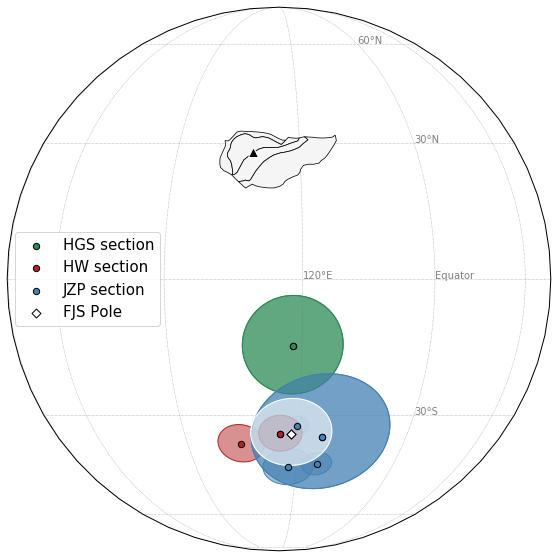

In [9]:
#Defien inputs
SCB_poles = pd.read_csv('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/Pygplates_files/FJS VGPs/FJS_VGPs.csv',header=0)

# Plot the map
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=115, central_latitude=0,
                                 figsize=(10,10), grid_lines=False)

lat_grid = [-80,-60,-30,0,30,60,90]
lon_grid = np.arange(-180,180+30,30)

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

#single_craton_plot(ax, '/Users/hairuo/Documents/research_applications/Gplates_elements/All Polygon/602 SCB from Li et al.(2008).gpml', 
                   #Eulers = [[0, 0, 0]], 
                   #edgecolor = 'black', 
                   #facecolor = 'none', 
                   #alpha = 1, 
                   #linewidth =1)

# plot SCB

craton_plot(ax, [6024], [[0,0,0]], 'black', 'whitesmoke', 1.0, .75)
craton_plot(ax, [6023], [[0,0,0]], 'black', 'whitesmoke', 1.0, .75)
craton_plot(ax, [602], [[0,0,0]], 'black', 'whitesmoke', 1.0, .75)

# Plot sampling site
ax.scatter(108.82,27.91,transform=ccrs.PlateCarree(), c='k',edgecolor='white',marker='^',zorder=200, s=10**2)

# Then plot some poles
for i in range(len(SCB_poles)):
    pole_plot = rotated_pole_plot(ax, SCB_poles['Plong'][i], SCB_poles['Plat'][i], SCB_poles['A95'][i] ,Eulers = [[0,0,0]],marker_color = SCB_poles['Color_ID'][i],s=40,
                                  a95_color = SCB_poles['Color_ID'][i],a95_alpha=0.5,label= SCB_poles['VGP_ID'][i],legend=False, marker = SCB_poles['marker'][i])
    
# For legend purpose
rotated_pole_plot(ax, SCB_poles['Plong'][0], SCB_poles['Plat'][0], SCB_poles['A95'][0] ,Eulers = [[0,0,0]],marker_color = SCB_poles['Color_ID'][0],s=40,
                                  a95_color = SCB_poles['Color_ID'][0],a95_alpha=0.5,label= SCB_poles['Legend'][0],legend=True, marker = SCB_poles['marker'][0])

rotated_pole_plot(ax, SCB_poles['Plong'][1], SCB_poles['Plat'][1], SCB_poles['A95'][1] ,Eulers = [[0,0,0]],marker_color = SCB_poles['Color_ID'][1],s=40,
                                  a95_color = SCB_poles['Color_ID'][1],a95_alpha=0.5,label= SCB_poles['Legend'][1],legend=True, marker = SCB_poles['marker'][1])

rotated_pole_plot(ax, SCB_poles['Plong'][3], SCB_poles['Plat'][3], SCB_poles['A95'][3] ,Eulers = [[0,0,0]],marker_color = SCB_poles['Color_ID'][3],s=40,
                                  a95_color = SCB_poles['Color_ID'][3],a95_alpha=0.5,label= SCB_poles['Legend'][3],legend=True, marker = SCB_poles['marker'][3])

rotated_pole_plot(ax, SCB_poles['Plong'][7], SCB_poles['Plat'][7], SCB_poles['A95'][7] ,Eulers = [[0,0,0]],marker_color = SCB_poles['Color_ID'][7],s=40,
                                  a95_color = SCB_poles['Color_ID'][7],a95_alpha=0.5,label= SCB_poles['Legend'][7],legend=True, marker = SCB_poles['marker'][7])


ax.legend(loc='center left',fontsize=15)

# Lable the grids
for i in [30,60]:
    ax.text(150,i,str(i)+'°N',transform=ccrs.Geodetic(),color='grey',size=10)
ax.text(150,0,'Equator',transform=ccrs.Geodetic(),color='grey',size=10)
ax.text(150,-30,'30°S',transform=ccrs.Geodetic(),color='grey',size=10)
ax.text(120,0,'120°E',transform=ccrs.Geodetic(),color='grey',size=10)
#for i in [90,120,150]:

#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S10 secular variation/FJS_VGPs_v1.1.pdf', bbox_inches='tight')
plt.show()

## 13.2 A95 test (Deenen et al., 2011)

In [43]:
# Calculate  A95 of all the samples (N=125)
data=np.loadtxt('data files/Secualr variation test/125 samples_Vgps_dp_dm.txt')
all_sample_vgp_mean = ipmag.fisher_mean(di_block=data)

ipmag.print_pole_mean(all_sample_vgp_mean)

Plon: 298.5  Plat: 32.9
Number of directions in mean (n): 125
Angular radius of 95% confidence (A_95): 3.1
Precision parameter (k) estimate: 17.4


In [29]:
# Calculate the critical values for A95 (N=125)
N=125
A95min=12*(N)**(-0.4)
A95max=82*(N)**(-0.63)
[A95min,A95max]

# A95 of all FJS VGPs (n=125) = 3.1
# The FJS data passes the PSV test by (Deenen et al. 2011)

[1.739471192826469, 3.915259429497095]

In [30]:
# Calculate  A95 of all the sills (N=7)
data=np.loadtxt('data files/Secualr variation test/7_sills_vgps_dp_dm.txt')
Plong_Plat=data[:,[0,1]]

ipmag.print_pole_mean(ipmag.fisher_mean(di_block=Plong_Plat))

Plon: 298.2  Plat: 34.7
Number of directions in mean (n): 7
Angular radius of 95% confidence (A_95): 8.6
Precision parameter (k) estimate: 50.7


In [31]:
# Calculate expected A95 of all the sills in Model-G(N=7)
N=7
A95min=12*(N)**(-0.4)
A95max=82*(N)**(-0.63)
[A95min,A95max]

# A95 of all FJS VGPs (n=7) = 8.9
# The FJS data passes the PSV test by (Deenen et al. 2011)

[5.5098785995132085, 24.065898859079635]

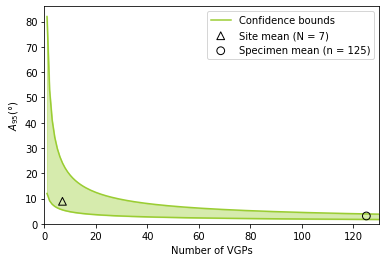

In [32]:
N = np.arange(0,131,1)

A95min=12*(N)**(-0.4)
A95max=82*(N)**(-0.63)

# Plot SB expected in Model-G

A95min_plot = plt.plot(N,A95min,label = 'Confidence bounds',linestyle='-',color='yellowgreen',alpha=1)
A95max_plot = plt.plot(N,A95max,linestyle='-',color='yellowgreen',alpha=1)

plt.fill_between(N,A95min,A95max, color='yellowgreen',alpha=0.4)

# Plot FJS SB
plt.scatter(7,8.9,marker = '^',
             s = 60,
             facecolor = 'none',edgecolor= 'black',
             linewidth = 1,zorder=10,label = 'Site mean (N = 7)')

plt.scatter(125,3.1,marker = 'o',
             s = 60,
             facecolor = 'none',edgecolor= 'black',
             linewidth = 1,zorder=10, label = 'Specimen mean (n = 125)')

plt.xlim(xmin=0,xmax=130)
plt.ylim(ymin=0)

plt.xlabel('Number of VGPs')
plt.ylabel('$A_{95}$(°)')
plt.legend()

#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S10 secular variation/A95 test.pdf', bbox_inches='tight')
plt.show()

## 13.3 VGP standard deviation test

In [33]:
# Paleolatitude of each sampling site (7 sills)
vgp=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/May_2021/Summary/VGPs/7_sills_plong_plat_k_n_Is.txt')
mean_vgp,r=pmag.vector_mean(vgp[:,(0,1)])

plat_calc=pmag.plat(vgp[:,4])
print(plat_calc)

[-46.86687467742401  -27.129196550530896 -24.69172152971704
 -24.539672472986638 -17.477484392541438 -17.796333868963867
 -28.534955960346373]


In [34]:
# Calculate ST for VGPs
# The txt should contain 5 columns -- 1.VGP_long 2.VGP_lat 3.k (precision parameter) 4.n (sample numbber for each VGP) 5. Direction Inclination of each VGP 
vgp=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/May_2021/Summary/VGPs/7_sills_plong_plat_k_n_Is.txt') 
mean_vgp,r=pmag.vector_mean(vgp[:,(0,1)])
summ=0
for i in range(0,len(vgp)):
    summ=summ+(pmag.angle(mean_vgp[0:2],vgp[i,[0,1]]))**2/(len(vgp)-1)
ST=math.sqrt(summ)
print ("ST =",ST)

ST = 11.42129746746686


In [35]:
# Calculate SB for VGPs
vgp=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/May_2021/Summary/VGPs/7_sills_plong_plat_k_n_Is.txt')
mean_vgp,r=pmag.vector_mean(vgp[:,(0,1)])

plat_calc=pmag.plat(vgp[:,4])
summ=0

for i in range(0,len(vgp)):
    K=vgp[i,2]*(((1/8)*(5+18*((math.sin(math.pi*plat_calc[i]/180))**2)+9*((math.sin(math.pi*plat_calc[i]/180))**4)))**(-1))
    SW=81/((K)**(1/2))
    summm=((pmag.angle(mean_vgp[0:2],vgp[i,[0,1]]))**2)-(SW**(2)/vgp[i,3])
    summ=summ+summm

SB_FJS =(summ/(len(vgp)-1))**(1/2)
print ("SB_FJS =",SB_FJS)

SB_FJS = [10.43577628116603]


In [36]:
### Jack Knief method to calculate 95% CI for VGP SB
vgp=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/May_2021/Summary/VGPs/7_sills_plong_plat_k_n_Is.txt')

'The input txt file should contains five columns: plong plat k n Is'

# Calculate ST for given VGPs
mean_vgp,r=pmag.vector_mean(vgp[:,(0,1)])
summ=0
for i in range(0,len(vgp)):
    summ=summ+(pmag.angle(mean_vgp[0:2],vgp[i,[0,1]]))**2/(len(vgp)-1)
ST=math.sqrt(summ)

# Calculate SB for given VGPs
mean_vgp,r=pmag.vector_mean(vgp[:,(0,1)])
plat_calc=pmag.plat(vgp[:,4])
summ=0

for i in range(0,len(vgp)):
    K=vgp[i,2]*(((1/8)*(5+18*((math.sin(math.pi*plat_calc[i]/180))**2)+9*((math.sin(math.pi*plat_calc[i]/180))**4)))**(-1))
    SW=81/((K)**(1/2))
    summm=((pmag.angle(mean_vgp[0:2],vgp[i,[0,1]]))**2)-(SW**(2)/vgp[i,3])
    summ=summ+summm

SB = float((summ/(len(vgp)-1))**(1/2))

# Calculate N-1 Jack knife uncertainty for given VGPs
SB_JN=list(range(0,len(vgp)))

for k in range(0,len(vgp)):
    vgp_JN=np.delete(vgp,k,0)
    mean_vgp,r=pmag.vector_mean(vgp_JN[:,(0,1)])
    plat_calc=pmag.plat(vgp_JN[:,4])
    summ=0
    
    for i in range(0,len(vgp_JN)):
        K=vgp_JN[i,2]*(((1/8)*(5+18*(math.sin(math.pi*plat_calc[i]/180)**2)+9*(math.sin(math.pi*plat_calc[i]/180)**4)))**(-1))
        SW=81/((K)**(1/2))
        summm=((pmag.angle(mean_vgp[0:2],vgp_JN[i,[0,1]]))**2)-(SW**(2)/vgp_JN[i,3])
        summ=summ+summm
        
    SB_JN[k]=(summ/(len(vgp_JN)-1))**(1/2)

# calculate the 95% CI for JN data
mean_SB=np.mean(SB_JN)
SB_std = np.sqrt((len(vgp)-1)*np.var(SB_JN,ddof=0)) # the formula is "1_sigma == sqrt[(N-1)*var(SB)]

print ("ST =",ST)
print ("SB =",SB)
print ("Estimated 1-sigma_error of SB =",SB_std)

ST = 11.42129746746686
SB = 10.43577628116603
Estimated 1-sigma_error of SB = 4.101586184344841


### Comparison with G-model

In [37]:
# Paleolatitude of the mean FJS sampling site
dir_from_FJS_pole = pmag.vgp_di(34.7,298.2,27.92,108.69)
plat_FJS = pmag.plat(dir_from_FJS_pole[1])

print('FJS paleolatitude of the mean sampling site =\n', plat_FJS)

FJS paleolatitude of the mean sampling site =
 -26.73766034840534


In [38]:
# Expected values of 0.5-1.5 Ga at -25.7 paleolatitude
bmin_i=10.07-0.54
bmax_i=10.07+0.54
amin_i=0.26-0.04
amax_i=0.26+0.04

Smin_i=(((amin_i*plat_FJS)**2)+bmin_i**2)**(1/2)
Smax_i=(((amax_i*plat_FJS)**2)+bmax_i**2)**(1/2)
print(Smin_i,Smax_i)

11.199204439418171 13.300876786197286


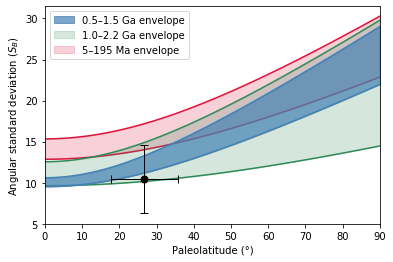

In [39]:
## Calculate expected S value in model G (Veikko 2014)

# 0.5–1.5 Ga Envelope (Veikko+ 2014)
bmin_i=10.07-0.54
bmax_i=10.07+0.54
amin_i=0.26-0.04
amax_i=0.26+0.04

# 1.0–2.2 Ga Envelope (Veikko+ 2014)
bmin_ii=11.10-1.46
bmax_ii=11.10+1.46
amin_ii=0.21-0.09
amax_ii=0.21+0.09

# 5–195 Ma Envelope (Veikko+ 2014)
bmin_iii=14.10-1.24
bmax_iii=14.10+1.24
amin_iii=0.25-0.04
amax_iii=0.25+0.04

# FJS sampling site mean paleolatitude
plat = -26.73766034840534
A95 = 8.6

# Latitude array
lat_all = np.arange(0,91,1)

# Plot 0.5–1.5 Ga Envelope
Smin_i=(((amin_i*lat_all)**2)+bmin_i**2)**(1/2)
Smax_i=(((amax_i*lat_all)**2)+bmax_i**2)**(1/2)

Smin_plot = plt.plot(lat_all,Smin_i,linestyle='-',color='steelblue',alpha=1,zorder=2)
plt.plot(lat_all,Smax_i,linestyle='-',color='steelblue',alpha=1,zorder=2)

plt.fill_between(lat_all, Smin_i, Smax_i, color='steelblue',alpha=0.7,label = '0.5–1.5 Ga envelope',zorder=2)

# Plot 1.0–2.2 Ga Envelope
Smin_ii=(((amin_ii*lat_all)**2)+bmin_ii**2)**(1/2)
Smax_ii=(((amax_ii*lat_all)**2)+bmax_ii**2)**(1/2)

Smin_plot = plt.plot(lat_all,Smin_ii,linestyle='-',color='seagreen',alpha=1,zorder=1)
plt.plot(lat_all,Smax_ii,linestyle='-',color='seagreen',alpha=1,zorder=1)

plt.fill_between(lat_all, Smin_ii, Smax_ii, color='seagreen',alpha=0.2,label = '1.0–2.2 Ga envelope',zorder=1)

# Plot 5–195 Ma Envelope
Smin_iii=(((amin_iii*lat_all)**2)+bmin_iii**2)**(1/2)
Smax_iii=(((amax_iii*lat_all)**2)+bmax_iii**2)**(1/2)

Smin_plot = plt.plot(lat_all,Smin_iii,linestyle='-',color='crimson',alpha=1,zorder=-1)
plt.plot(lat_all,Smax_iii,linestyle='-',color='crimson',alpha=1,zorder=-1)

plt.fill_between(lat_all, Smin_iii, Smax_iii, color='crimson',alpha=0.2,label = '5–195 Ma envelope',zorder=-1)


## Plot FJS SB
plt.errorbar(abs(plat),SB_FJS,
             xerr = 8.9, yerr = SB_std ,
             fmt = 'o',
             ms = 5^2,
             c = 'black',
             capsize = 4,
             ecolor = 'black',
             elinewidth = 1,
             markeredgewidth = 1,zorder=10)


plt.xlim(xmin=0,xmax=90)
plt.ylim(ymin=5)

plt.xlabel('Paleolatitude (°)')
plt.ylabel('Angular standard deviation ($S_{B}$)')
plt.legend()

plt.show()
# plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S10 secular variation/SB test.pdf', bbox_inches='tight')

## 14. Neoproterozoic + Phanerozoic APWP of SCB

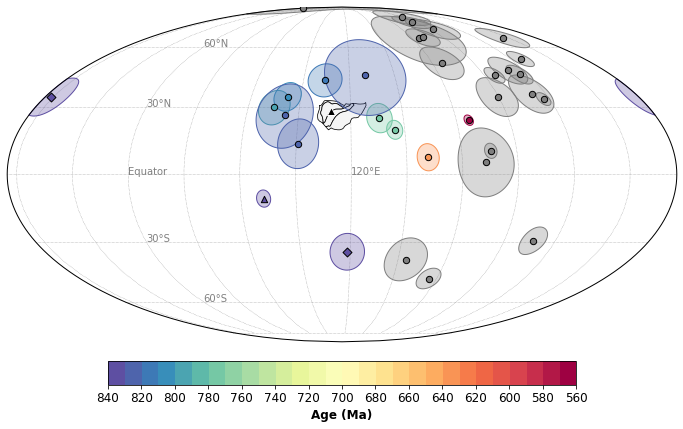

In [40]:
#Defien inputs
SCB_poles = pd.read_csv('data files/Total rotation poles/SCB APWP_v1.1.csv',header=0)

# Plot the map
ax = ipmag.make_mollweide_map(add_land=False, central_longitude=115,
                                 figsize=(12,12), grid_lines=False)

lat_grid = [-80,-60,-30,0,30,60,90]
lon_grid = np.arange(-180,180+30,30)

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

#single_craton_plot(ax, '/Users/hairuo/Documents/research_applications/Gplates_elements/All Polygon/602 SCB from Li et al.(2008).gpml', 
                   #Eulers = [[0, 0, 0]], 
                   #edgecolor = 'black', 
                   #facecolor = 'none', 
                   #alpha = 1, 
                   #linewidth =1)

# Color bar
vmin=np.min(560)
vmax=np.max(840)

c_m = plt.get_cmap('Spectral',2*(len(np.arange(560,860,20))-1))

color_mapping = plt.cm.ScalarMappable(cmap = c_m,norm=plt.Normalize(vmin=vmin,vmax=vmax))
plate_colors = color_mapping.to_rgba(SCB_poles['Age_mean'])
pole_colors = color_mapping.to_rgba(SCB_poles['Age_mean'])


# plot SCB

craton_plot(ax, [6024], [[0,0,0]], 'black', 'whitesmoke', 1.0, .75)
craton_plot(ax, [6023], [[0,0,0]], 'black', 'whitesmoke', 1.0, .75)
craton_plot(ax, [602], [[0,0,0]], 'black', 'whitesmoke', 1.0, .75)

# Plot sampling site
ax.scatter(108.82,27.91,transform=ccrs.PlateCarree(), c='k',edgecolor='white',marker='^',zorder=200, s=8**2)

# Then plot some poles

 # Neoproterozoic
for i in range(13):
    pole_plot = rotated_pole_plot(ax, SCB_poles['Plong'][i+20], SCB_poles['Plat'][i+20], SCB_poles['A95'][i+20] ,Eulers = [[0,0,0]],marker_color = pole_colors[i+20],s=40,
                                  a95_color = pole_colors[i+20],a95_alpha=0.3,legend=False, marker = SCB_poles['marker'][i+20])
 # Phanerozoic
for i in range(len(SCB_poles)-13):
    pole_plot = rotated_pole_plot(ax, SCB_poles['Plong'][i], SCB_poles['Plat'][i], SCB_poles['A95'][i] ,Eulers = [[0,0,0]],marker_color = 'C7',s=40,
                                  a95_color = 'C7',a95_alpha=0.3,legend=False, marker = SCB_poles['marker'][i])

#ax.legend(loc='center left',fontsize=15)

# Color bar
cb = plt.colorbar(color_mapping, ax = ax, ticks = np.arange(560,860,20),orientation='horizontal',pad=0.03,shrink=0.7)
cb.ax.tick_params(labelsize=12)
cb.set_label(label='Age (Ma)', size=12, weight='bold')
cb.ax.invert_xaxis()

# Lable the grids
for i in [30,60]:
    ax.text(0,i,str(i)+'°N',transform=ccrs.Geodetic(),color='grey',size=10)
for i in [30,60]:
    ax.text(0,-i,str(i)+'°S',transform=ccrs.Geodetic(),color='grey',size=10)
ax.text(0,0,'Equator',transform=ccrs.Geodetic(),color='grey',size=10)
ax.text(120,0,'120°E',transform=ccrs.Geodetic(),color='grey',size=10)
#for i in [90,120,150]:

plt.show()
# plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S11 SCB poles/SCB_VGPs.pdf', bbox_inches='tight')

# 15. Regression model of TPW hisoty data

In [35]:
# Read TPW data
TPW_history = pd.read_csv('data files/TPW_history/TPW_history (no ediacaran).csv',header=0)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     13.37
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           0.000753
Time:                        17:04:38   Log-Likelihood:                -161.02
No. Observations:                  41   AIC:                             326.0
Df Residuals:                      39   BIC:                             329.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1421      3.008      3.704      0.0

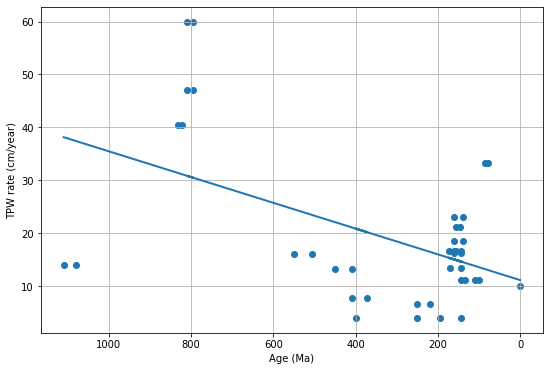

In [39]:
# Simple linear regression

fig, (ax1) = plt.subplots(1,figsize=(9,6))

# synthetic sample data
n_points = len(TPW_history)
data_df = pd.DataFrame({'x': TPW_history['Age'], 'y': TPW_history['rate_cm_mean']})
ols_model = sm.ols(formula = 'y ~ x', data=data_df)
results = ols_model.fit()
print(results.summary())

y_pred = ols_model.fit().predict(data_df['x'])

# coefficients
#print('Intercept, x-Slope : {}'.format(results.params))
#y_pred = ols_model.fit().predict(data_df['x'])

# plot results
plt.scatter(TPW_history['Age'], TPW_history['rate_cm_mean'])
plt.plot(TPW_history['Age'], y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('Age (Ma)')
plt.ylabel('TPW rate (cm/year)')
ax1.invert_xaxis()
#plt.title('x vs y')

plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     13.37
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           0.000753
Time:                        17:04:45   Log-Likelihood:                -161.02
No. Observations:                  41   AIC:                             326.0
Df Residuals:                      39   BIC:                             329.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1421      3.008      3.704      0.0

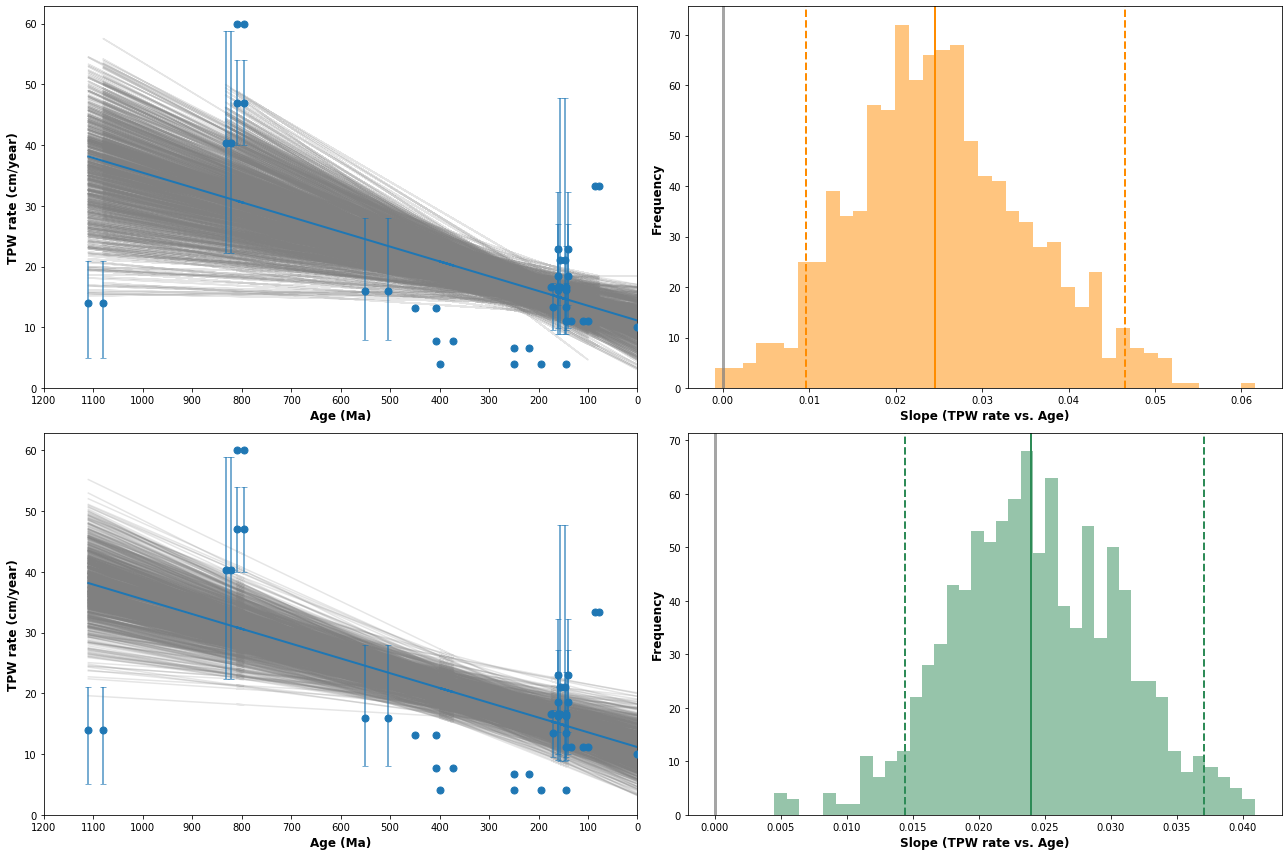

In [40]:
np.random.seed(2021)

fig, ax = plt.subplots(2,2,figsize=(18,12))

# Simple linear regression

data_df = pd.DataFrame({'x': TPW_history['Age'], 'y': TPW_history['rate_cm_mean']})
ols_model = sm.ols(formula = 'y ~ x', data=data_df)
results = ols_model.fit()
print(results.summary())
y_pred = ols_model.fit().predict(data_df['x'])


''' Fig (A & B) Parametric bootstrap linear regression '''
### Plot ax[0], TPW bootstrap linear regression

# Set boots
boot_slopes = []
boot_interc = []
boot_pvalue = []
n_boots = 1000

data_df = pd.DataFrame({'x': TPW_history['Age'], 'y': TPW_history['rate_cm_mean']})

for _ in range(n_boots):
 # sample the rows, same size, with replacement
 sample_df = data_df.sample(n=len(data_df), replace=True)
 # fit a linear regression
 ols_model_temp = sm.ols(formula = 'y ~ x', data=sample_df)
 results_temp = ols_model_temp.fit()

# append coefficients
 boot_interc.append(results_temp.params[0])
 boot_slopes.append(results_temp.params[1])
 boot_pvalue.append(results_temp.pvalues[1])
 
 # plot a greyed out line
 y_pred_temp = ols_model_temp.fit().predict(sample_df['x'])
 ax[0][0].plot(sample_df['x'], y_pred_temp, color='grey', alpha=0.2, zorder=-10)

markers, caps, bars = ax[0][0].errorbar(TPW_history['Age'], TPW_history['rate_cm_mean'],
            yerr = [TPW_history['error_down'], TPW_history['error_up']],
             fmt = 'o',
             ms = 7,
             capsize = 3,
             elinewidth = 2,
             markeredgewidth = 1,zorder=10)
[bar.set_alpha(0.6) for bar in bars]
[cap.set_alpha(0.6) for cap in caps]

ax[0][0].plot(TPW_history['Age'], y_pred, linewidth=2,color='#1f77b4')
ax[0][0].grid(False)
ax[0][0].set_xticks(np.arange(0,1200+100,100))
ax[0][0].set_xlabel('Age (Ma)',fontweight='bold',size=12)
ax[0][0].set_ylabel('TPW rate (cm/year)', fontweight='bold',size=12)
ax[0][0].set_xlim(xmin=0, xmax=1200)
ax[0][0].set_ylim(ymin=0)
#plt.title('x vs y')
ax[0][0].invert_xaxis()

### Plot ax[1], histogram of the boostraped slopes
bins = np.linspace(np.min(boot_slopes),
                   np.max(boot_slopes),
                   40)

ax[0][1].hist(boot_slopes, alpha=0.5, bins=bins, label='Subtract no plate motion',color='darkorange')

boot_slopes_02_5 = stats.scoreatpercentile(boot_slopes, 5)
boot_slopes_50_0 = stats.scoreatpercentile(boot_slopes, 50)
boot_slopes_97_5 = stats.scoreatpercentile(boot_slopes, 97.5)

ax[0][1].axvline(boot_slopes_02_5, ls='--',linewidth=2,alpha=1,c='darkorange')
ax[0][1].axvline(boot_slopes_50_0, ls='-',linewidth=2,alpha=1,c='darkorange')
ax[0][1].axvline(boot_slopes_97_5, ls='--',linewidth=2,alpha=1, c='darkorange')
#ax[0].axvline(boot_slopes_50_0, c='seagreen', ls='-',linewidth=2,alpha=0.7)

ax[0][1].axvline(0, c='C7', ls='-',linewidth=3,alpha=0.7)
ax[0][1].set_xlabel('Slope (TPW rate vs. Age)', fontweight='bold',size=12)
ax[0][1].set_ylabel('Frequency', fontweight='bold',size=12)



''' Fig (C & D) Parametric bootstrap linear regression '''
### Plot ax[2], TPW bootstrap linear regression

# Set boots
data_df = pd.DataFrame({'x': TPW_history['Age'], 'y': TPW_history['rate_cm_mean']})

ols_model = sm.ols(formula = 'y ~ x', data=data_df)
results = ols_model.fit()
# get predicted values
y_pred = results.predict(data_df['x'])
# get residual values
resids = results.resid

boot2_slopes = []
boot2_interc = []
n_boots = 1000

for _ in range(n_boots):
 # create a sampling of the residuals with replacement
 boot_resids = np.random.choice(resids, len(TPW_history), replace=True)
 y_temp = [y_pred_i + resid_i for y_pred_i, resid_i in zip(y_pred, boot_resids)]
 
 sample_df = pd.DataFrame({'x': TPW_history['Age'], 'y': y_temp})
 # Fit a linear regression
 ols_model_temp = sm.ols(formula = 'y ~ x', data=sample_df)
 results_temp = ols_model_temp.fit()
 
 # get coefficients
 boot2_interc.append(results_temp.params[0])
 boot2_slopes.append(results_temp.params[1])
 
 # plot a greyed out line
 y_pred_temp = ols_model_temp.fit().predict(sample_df['x'])

 ax[1][0].plot(sample_df['x'], y_pred_temp, color='grey', alpha=0.2,zorder= -10)
    
# add data points
markers, caps, bars = ax[1][0].errorbar(TPW_history['Age'], TPW_history['rate_cm_mean'],
            yerr = [TPW_history['error_down'], TPW_history['error_up']],
             fmt = 'o',
             ms = 7,
             capsize = 3,
             elinewidth = 2,
             markeredgewidth = 1,zorder=10)
[bar.set_alpha(0.6) for bar in bars]
[cap.set_alpha(0.6) for cap in caps]

ax[1][0].plot(TPW_history['Age'], y_pred, linewidth=2, color='#1f77b4')
ax[1][0].grid(False)
ax[1][0].set_xticks(np.arange(0,1200+100,100))
ax[1][0].set_xlabel('Age (Ma)',fontweight='bold',size=12)
ax[1][0].set_ylabel('TPW rate (cm/year)', fontweight='bold',size=12)
ax[1][0].set_xlim(xmin=0, xmax=1200)
ax[1][0].set_ylim(ymin=0)
#plt.title('x vs y')
ax[1][0].invert_xaxis()


### Plot ax[1], histogram of the boostraped slopes
bins = np.linspace(np.min(boot2_slopes),
                   np.max(boot2_slopes),
                   40)

ax[1][1].hist(boot2_slopes, alpha=0.5, bins=bins, label='Subtract no plate motion',color='seagreen')

boot2_slopes_02_5 = stats.scoreatpercentile(boot2_slopes, 5)
boot2_slopes_50_0 = stats.scoreatpercentile(boot2_slopes, 50)
boot2_slopes_97_5 = stats.scoreatpercentile(boot2_slopes, 97.5)

ax[1][1].axvline(boot2_slopes_02_5, ls='--',linewidth=2,alpha=1,c='seagreen')
ax[1][1].axvline(boot2_slopes_50_0, ls='-',linewidth=2,alpha=1,c='seagreen')
ax[1][1].axvline(boot2_slopes_97_5, ls='--',linewidth=2,alpha=1, c='seagreen')
#ax[0].axvline(boot_slopes_50_0, c='seagreen', ls='-',linewidth=2,alpha=0.7)

ax[1][1].axvline(0, c='C7', ls='-',linewidth=3,alpha=0.7)
ax[1][1].set_xlabel('Slope (TPW rate vs. Age)', fontweight='bold',size=12)
ax[1][1].set_ylabel('Frequency', fontweight='bold',size=12)

fig.tight_layout()
#plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/Figs+Tabs/Figs/Jun_2021/SM/Fig_S13_TPW_history_linear regression/TPW linear regression(case+residual)_July.pdf', bbox_inches='tight')